# Pima Indian Diabetes Dataset

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence, plot_partial_dependence
from sklearn.inspection import permutation_importance
import shap
from pdpbox import pdp
from PyALE import ale

Load the dataset

In [18]:
file_path = 'diabetes.csv'  
df = pd.read_csv(file_path)
df.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Decision Tree

In [19]:

X_dt = df.drop(['Outcome'], axis=1) 
y_dt = df['Outcome']


X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.1, random_state=42)

# Create a decision tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_dt, y_train_dt)
y_pred_dt = clf_dt.predict(X_test_dt)

# Model Accuracy
accuracy_score_dt= metrics.accuracy_score(y_test_dt, y_pred_dt)
print('accuracy score is', str('{:04.2f}'.format(accuracy_score_dt*100))+'%')

accuracy score is 79.22%


## Decision Rules 

Plot the decision tree

In [20]:
# Generate a text representation of the decision tree
tree_rules = export_text(clf_dt, feature_names=list(X_dt.columns))

print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  7.50
|   |   |   |   |--- class: 1
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- BMI <= 31.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- BMI >  31.10
|   |   |   |   |   |   |--- SkinThickness <= 8.00
|   |   |   |   |   |   |   |--- Glucose <= 109.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Glucos

## Tree Visualization 

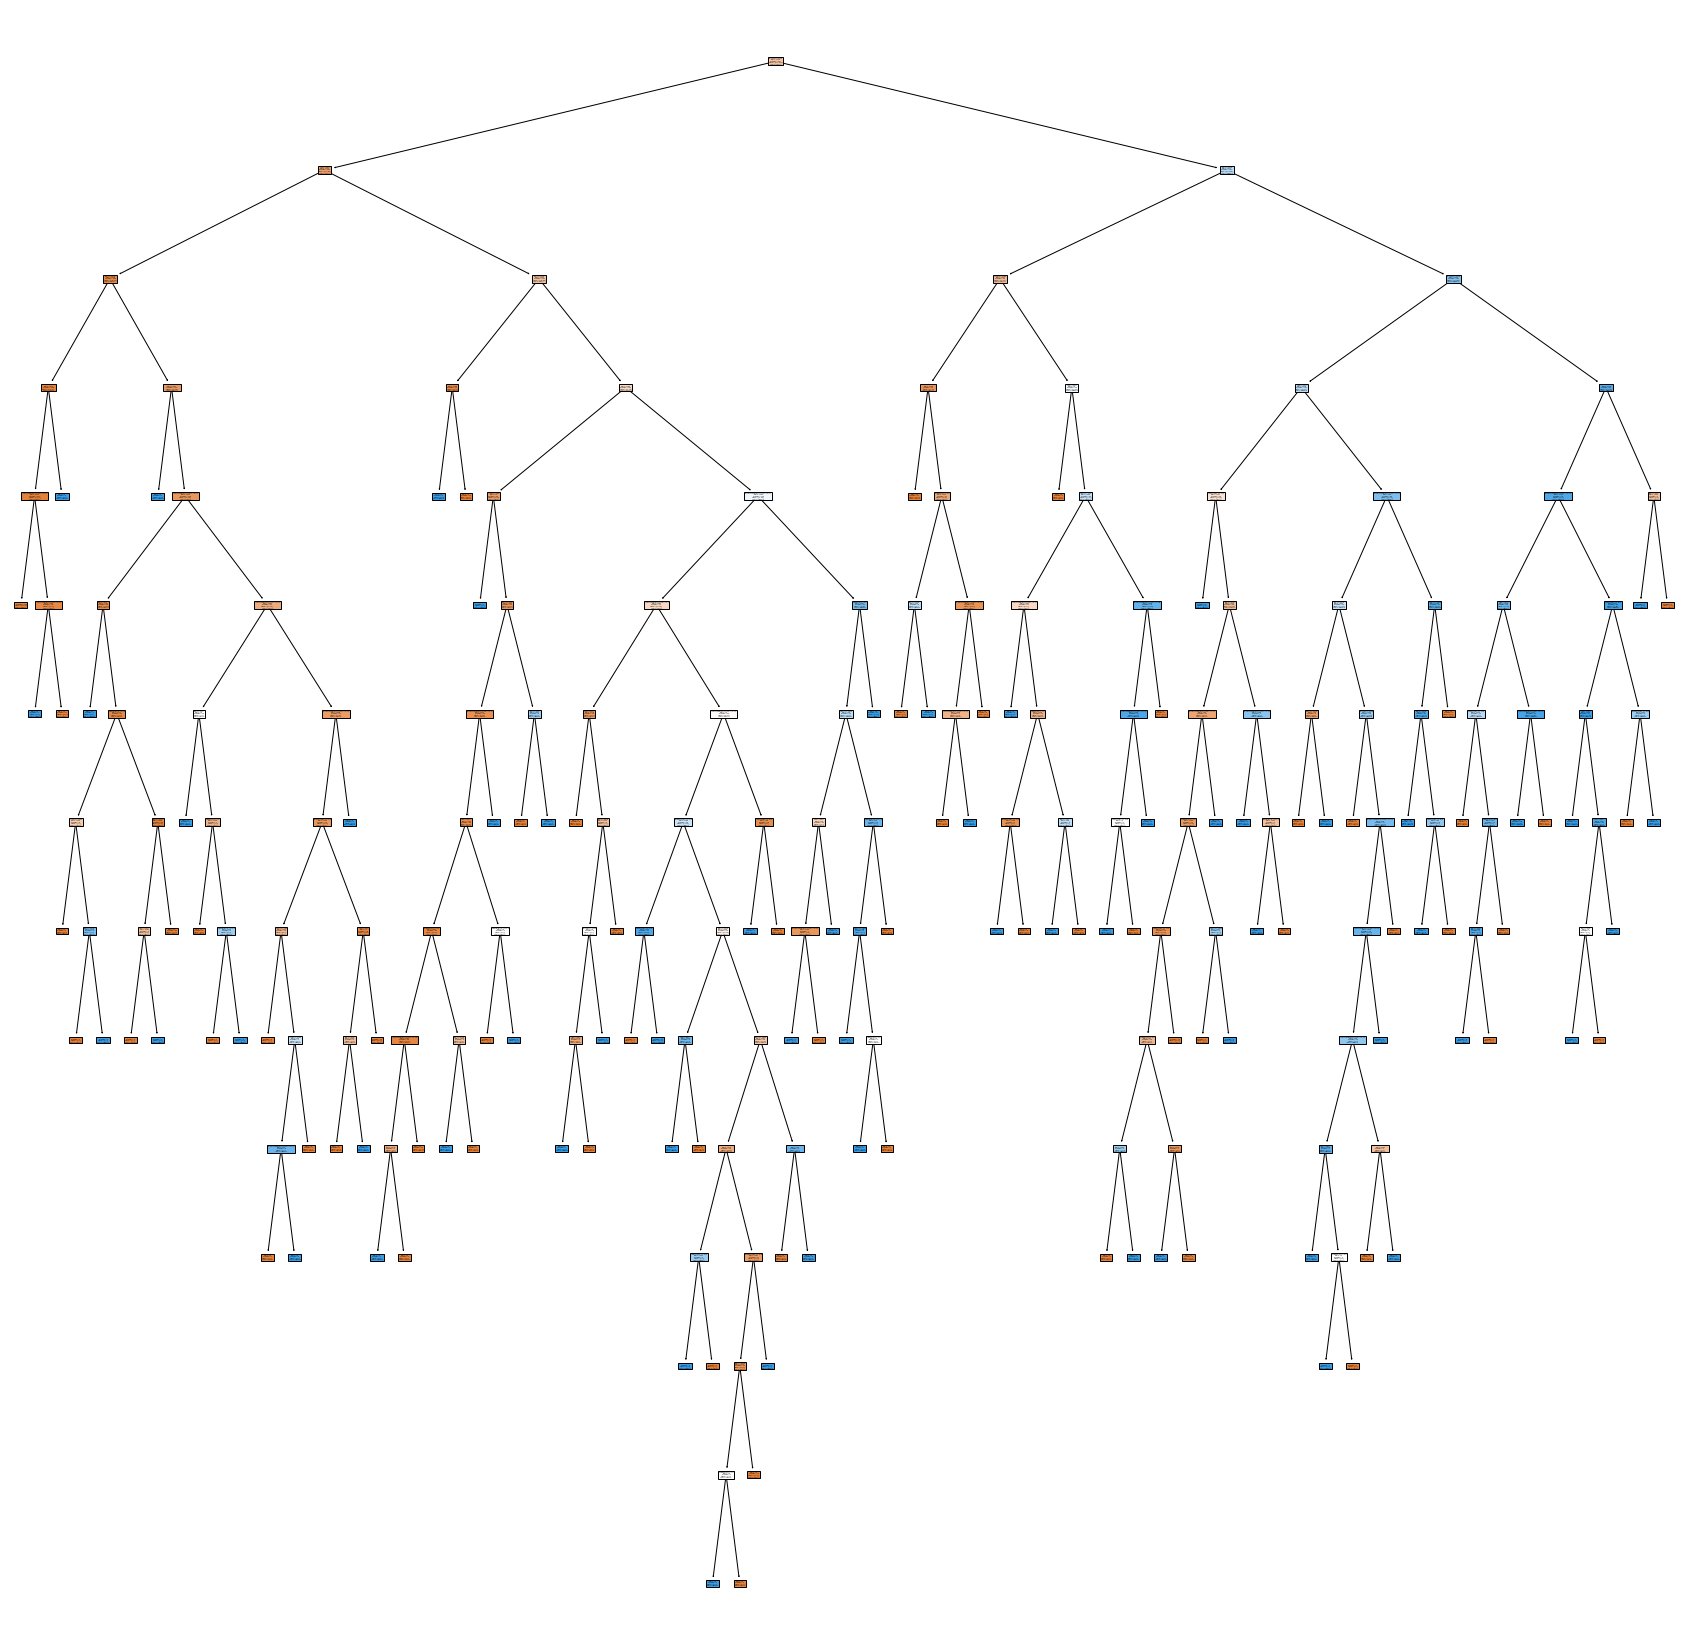

In [21]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(clf_dt, ax=ax, feature_names=X_dt.columns, class_names=['Healthy', 'Diabetes'], filled=True)
plt.show()

## Gini Importance (Model-Specific Methods)

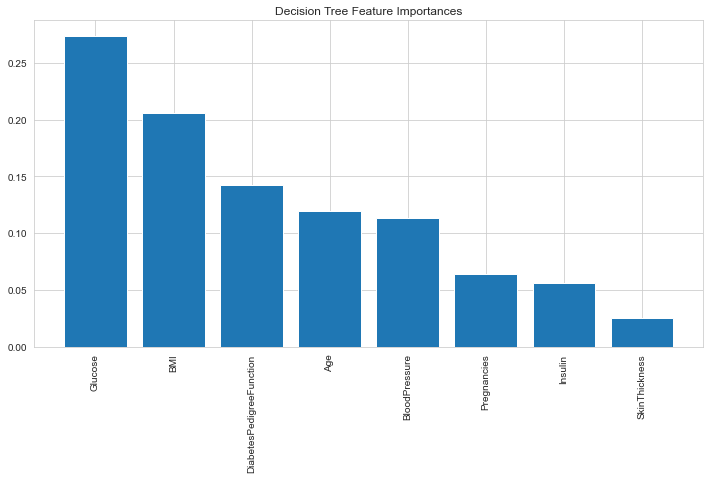

In [22]:
feature_importances_dt = clf_dt.feature_importances_
indices_dt = feature_importances_dt.argsort()[::-1]
feature_names_dt = X_dt.columns[indices_dt]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.title("Decision Tree Feature Importances")
plt.bar(range(X_dt.shape[1]), feature_importances_dt[indices_dt])
plt.xticks(range(X_dt.shape[1]), feature_names_dt, rotation=90)
plt.show()

## Permutation importance 

Glucose: 0.1662
BMI: 0.1325
Age: 0.1000
DiabetesPedigreeFunction: 0.0935
Pregnancies: 0.0364
BloodPressure: 0.0351
SkinThickness: 0.0078
Insulin: -0.0117


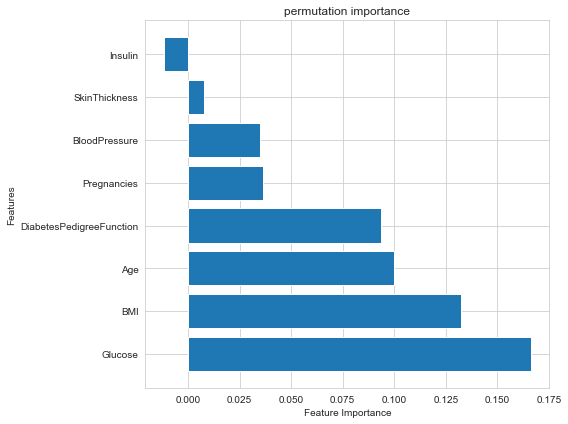

In [23]:
# permutation importance
result_dt = permutation_importance(clf_dt, X_test_dt, y_test_dt, n_repeats=10, random_state=42)

# Get feature importance scores
importance_scores_dt = result_dt.importances_mean

# Sort features by importance score in descending order
sorted_indices_dt = np.argsort(importance_scores_dt)[::-1]
sorted_features_dt = X_dt.columns[sorted_indices_dt]
sorted_scores_dt = importance_scores_dt[sorted_indices_dt]

# Print feature importance
for feature_dt, score_dt in zip(sorted_features_dt, sorted_scores_dt):
    print("{}: {:.4f}".format(feature_dt, score_dt))

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(sorted_features_dt, sorted_scores_dt)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('permutation importance')
plt.tight_layout()
plt.show()

## SHAP

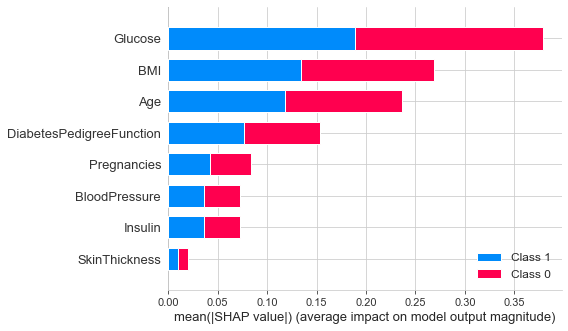

In [24]:
# Create an explainer object for the decision tree classifier
explainer = shap.Explainer(clf_dt, X_train_dt)

# Calculate SHAP values for all features
shap_values = explainer.shap_values(X_test_dt)

shap.summary_plot(shap_values, X_test_dt, plot_type='bar')

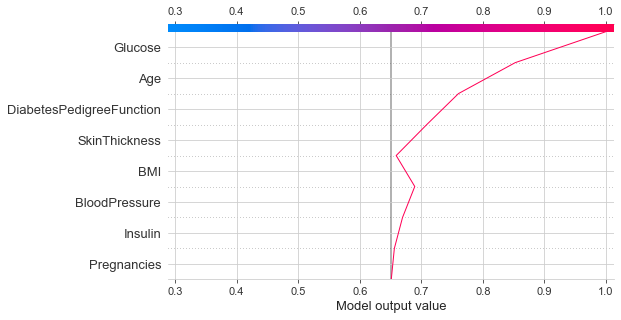

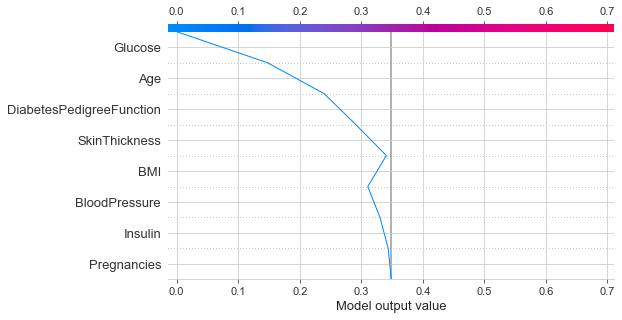

In [25]:
np.random.seed(36)

explainer_dt = shap.TreeExplainer(clf_dt)

# Select the instance for generating the explanation
i_dt = 1
data_for_prediction_dt = X_test_dt.iloc[i_dt, :]

# Generate SHAP values for the instance
shap_values_dt = explainer_dt.shap_values(data_for_prediction_dt)

# Set the class index for negative prediction
class_index_dt = 0  

# Access the expected value for the negative class
expected_value_negative_dt = explainer_dt.expected_value[class_index_dt]


shap_values_negative_dt = shap_values_dt[class_index_dt]

# Initialize the JS 
shap.initjs()

# And also plot the positive
shap.decision_plot(expected_value_negative_dt, shap_values_negative_dt, feature_names=X_test_dt.columns.tolist())
class_index_dt = 1  
expected_value_positive_dt = explainer_dt.expected_value[class_index_dt]
shap_values_positive_dt = shap_values_dt[class_index_dt]
shap.initjs()

# Create the decision plot 
shap.decision_plot(expected_value_positive_dt, shap_values_positive_dt, feature_names=X_test_dt.columns.tolist())

## ALE 

                  eff  size
Pregnancies                
0            0.036364   0.0
1            0.036364  19.0
2            0.036364  11.0
3            0.036364   5.0
4            0.036364   9.0
5           -0.063636  10.0
6           -0.063636   6.0
7           -0.063636   4.0
8           -0.063636   3.0
9           -0.063636   3.0
10          -0.063636   2.0
12          -0.063636   3.0
13          -0.063636   2.0
              eff  size
Glucose                
71       0.292208   0.0
74       0.292208   2.0
81       0.292208   2.0
83       0.292208   1.0
84       0.292208   2.0
85       0.292208   1.0
88       0.292208   3.0
91       0.292208   2.0
92       0.292208   2.0
94       0.292208   1.0
95       0.292208   2.0
96       0.292208   2.0
100     -0.207792   2.0
102     -0.207792   1.0
103     -0.207792   3.0
104     -0.207792   3.0
106     -0.207792   2.0
107     -0.207792   1.0
109     -0.207792   5.0
111     -0.207792   2.0
112     -0.207792   2.0
117     -0.207792   1.0
121 

PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


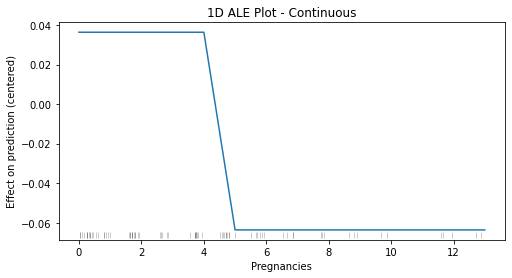

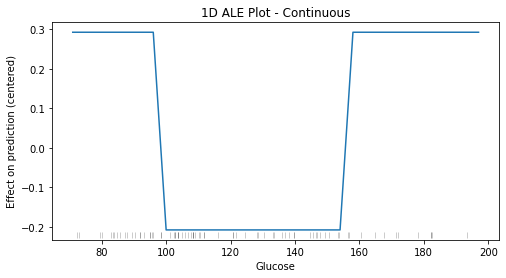

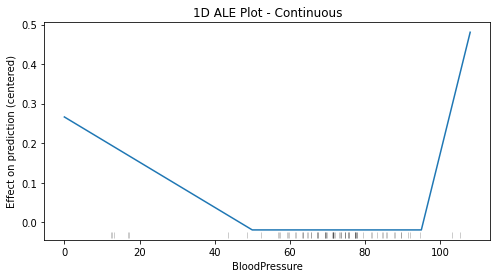

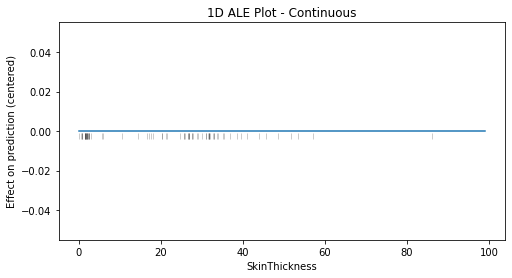

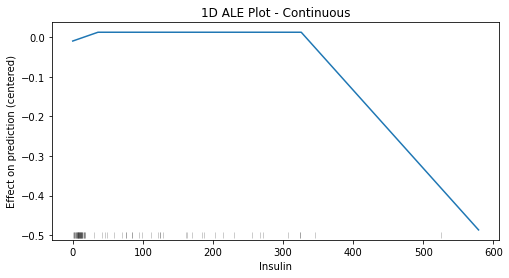

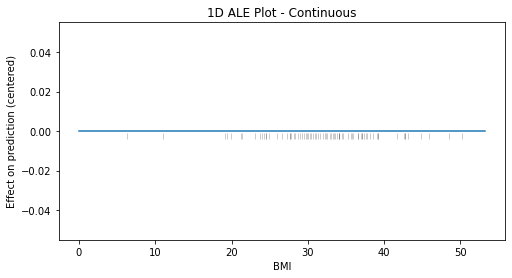

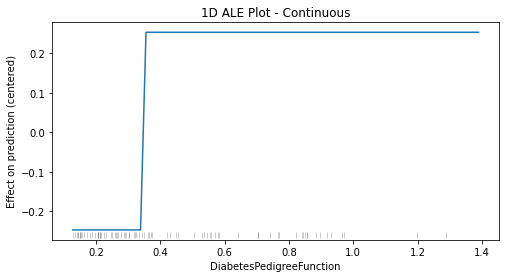

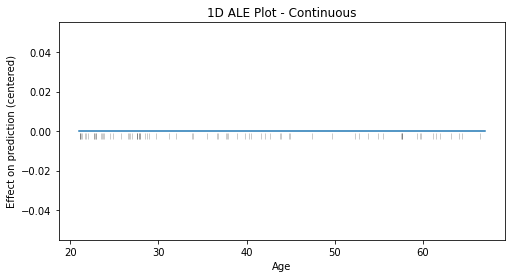

In [9]:
for feature in X_test_dt.columns:
    ale_eff_dt = ale(X=X_test_dt, model=clf_dt, feature=[feature], grid_size=50, include_CI=False)
    print(ale_eff_dt)

## PDP

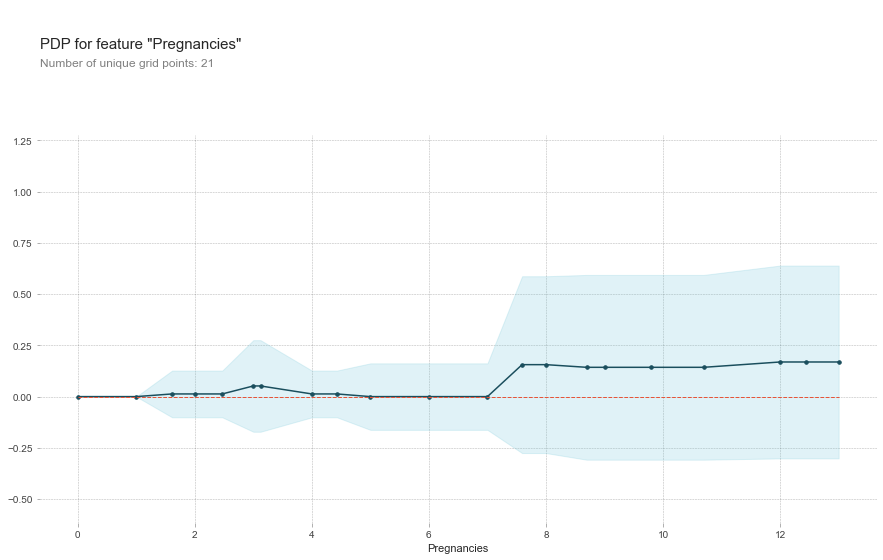

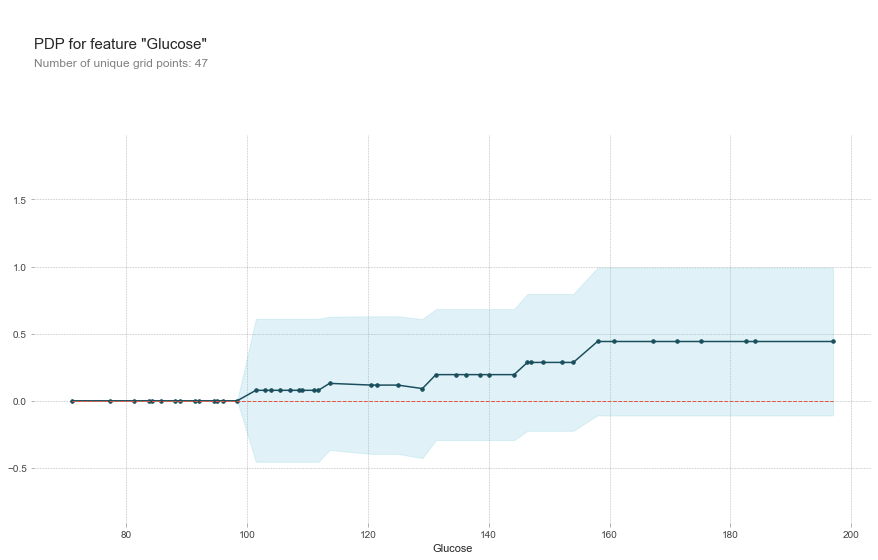

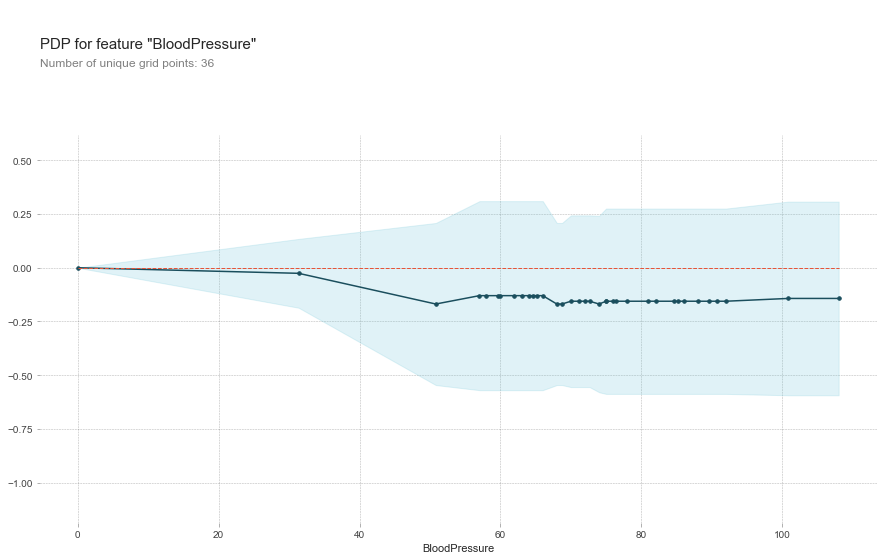

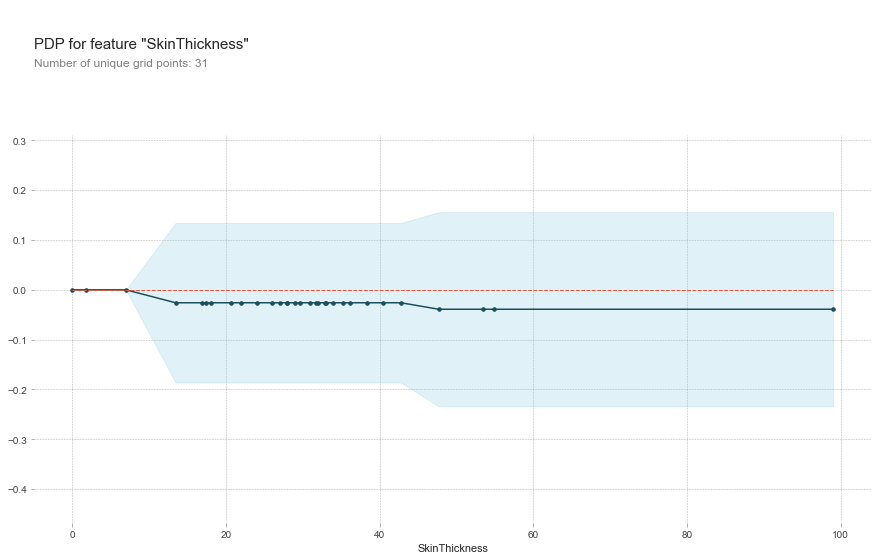

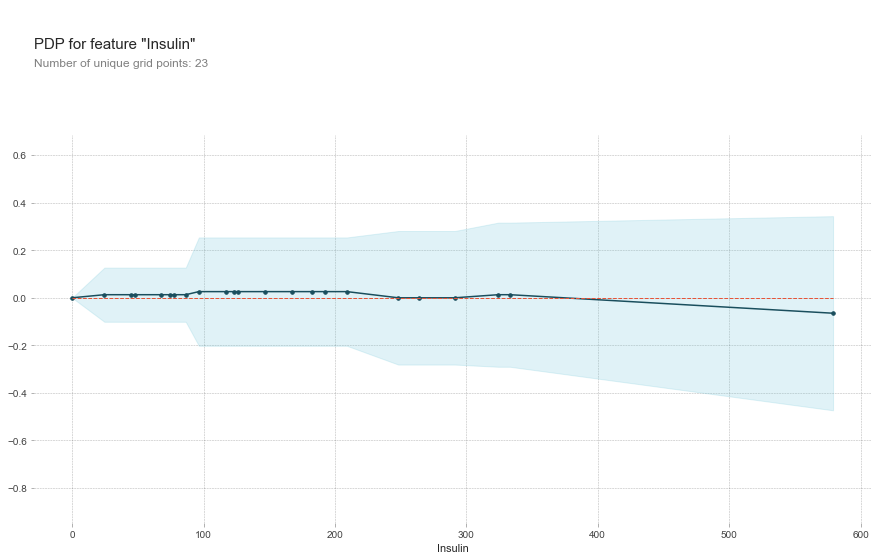

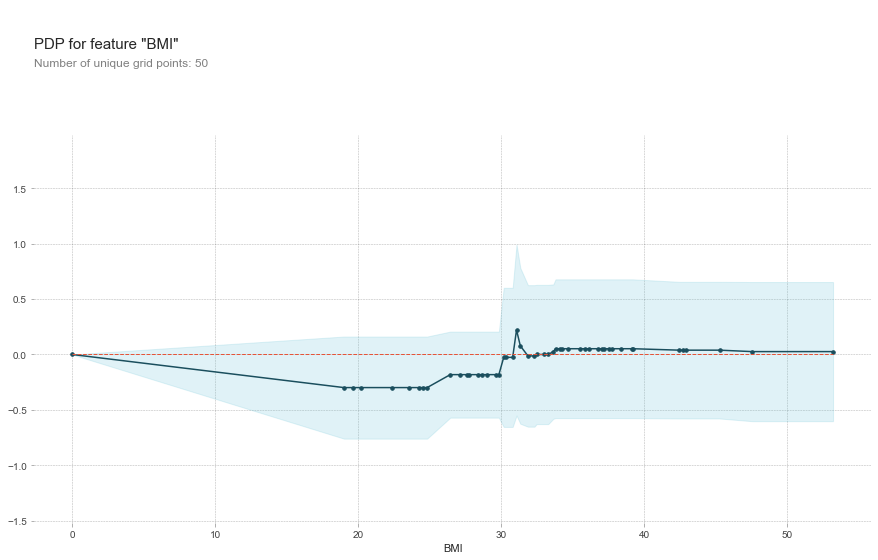

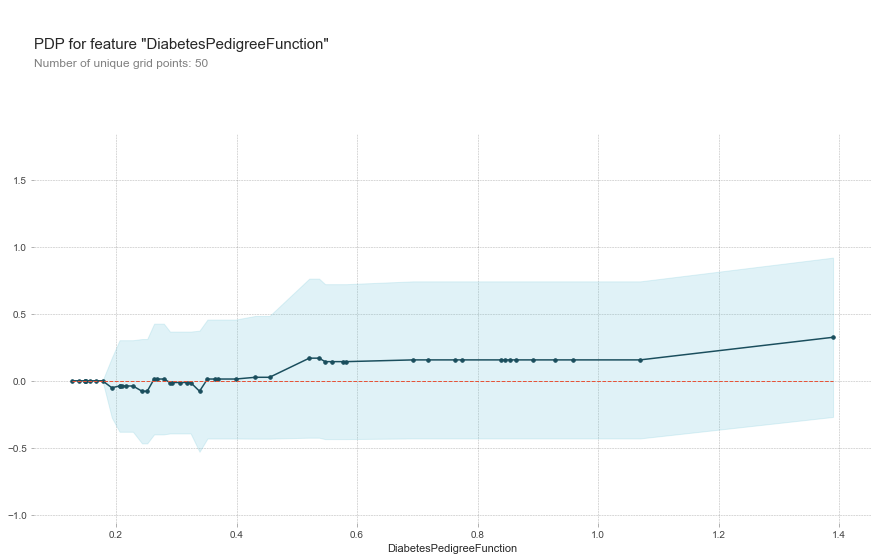

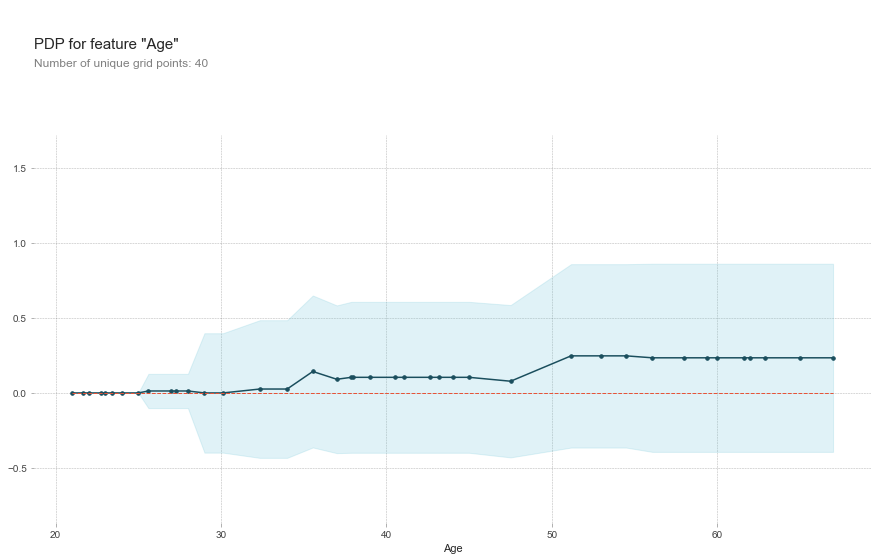

In [26]:
# Iterate over each feature and plot the pdp curve
for feature_name in X_test_dt.columns:
    # Calculate pdp data
    pdp_data_dt_all = pdp.pdp_isolate(model=clf_dt, dataset=X_test_dt, model_features=X_test_dt.columns, feature=feature_name,num_grid_points = 50)

    # Plot pdp curve
    pdp.pdp_plot(pdp_data_dt_all, feature_name)
    plt.show()

## Decision Tree Optimization 

Now to improve the performance of the model on the domain of illness detection, we hereby create a new decision tree that classifies cases as "unknown" if they are very close to the boundary of the key features (defined by feature importance method)

Print wrongly perdicted cases for old tree

In [27]:
import pandas as pd

# Create DataFrame with misclassified samples for Decision Tree Classifier
df_misclassified_dtc = pd.DataFrame({'True Label': y_test_dt, 'Predicted Label': y_pred_dt, 'Features': X_test_dt.values.tolist()})
df_misclassified_dtc = df_misclassified_dtc[df_misclassified_dtc['True Label'] != df_misclassified_dtc['Predicted Label']]
print(df_misclassified_dtc)

     True Label  Predicted Label  \
668           0                1   
336           0                1   
667           1                0   
212           0                1   
356           1                0   
328           1                0   
67            0                1   
30            0                1   
635           1                0   
487           0                1   
451           1                0   
254           1                0   
211           0                1   
54            0                1   
109           1                0   
362           0                1   

                                              Features  
668   [6.0, 98.0, 58.0, 33.0, 190.0, 34.0, 0.43, 43.0]  
336     [0.0, 117.0, 0.0, 0.0, 0.0, 33.8, 0.932, 44.0]  
667  [10.0, 111.0, 70.0, 27.0, 0.0, 27.5, 0.141, 40.0]  
212   [7.0, 179.0, 95.0, 31.0, 0.0, 34.2, 0.164, 60.0]  
356  [1.0, 125.0, 50.0, 40.0, 167.0, 33.3, 0.962, 2...  
328  [2.0, 102.0, 86.0, 36.0, 120.0, 45.5, 0.

In [28]:
# Find instances with incorrect predictions
incorrect_predictions = X_test_dt[y_pred_dt != y_test_dt]
actual_classes = y_test_dt[y_pred_dt != y_test_dt]

# Print incorrect predictions and their actual classes
for index, instance in incorrect_predictions.iterrows():
    print("Incorrectly predicted instance:")
    print(instance)
    print("Actual class:", actual_classes.loc[index])
    print("----------------------")

Incorrectly predicted instance:
Pregnancies                   6.00
Glucose                      98.00
BloodPressure                58.00
SkinThickness                33.00
Insulin                     190.00
BMI                          34.00
DiabetesPedigreeFunction      0.43
Age                          43.00
Name: 668, dtype: float64
Actual class: 0
----------------------
Incorrectly predicted instance:
Pregnancies                   0.000
Glucose                     117.000
BloodPressure                 0.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          33.800
DiabetesPedigreeFunction      0.932
Age                          44.000
Name: 336, dtype: float64
Actual class: 0
----------------------
Incorrectly predicted instance:
Pregnancies                  10.000
Glucose                     111.000
BloodPressure                70.000
SkinThickness                27.000
Insulin                       0.000
BMI                       

Because of Uncertainty near boundary, label case close to boundary as “unknown” class !

In [29]:
# Define a function to classify cases as "unknown" based on proximity to the boundary
def classify_unknown(X):
    # Define the threshold values for proximity to the boundary
    #ppe_threshold = 0.13
    #mdvp_fo_threshold = 192.27
    #hnr_threshold = 25.55
    #mdvp_fo_threshold2 = 208.8
    Glucose_threshold = 109.5
    BMI_threshold = 29

    
    
    # Classify cases as "unknown" if they are close to the boundary
    classification = clf_dt.predict(X)
    for i in range(len(X)):
        if (
            #abs(X.iloc[i]['PPE'] - ppe_threshold) / ppe_threshold <= 0 or
            #abs(X.iloc[i]['MDVP:Fo(Hz)'] - mdvp_fo_threshold) / mdvp_fo_threshold <= 0 or
            #abs(X.iloc[i]['HNR'] - hnr_threshold) / hnr_threshold <= 0 or
            abs(X.iloc[i]['Glucose'] - Glucose_threshold) / Glucose_threshold <= 0.1 or
            abs(X.iloc[i]['BMI'] - BMI_threshold) / BMI_threshold <= 0.1
            
        ):
            classification[i] = -1
    
    return classification

# Classify the test set including "unknown" cases
y_pred_dt_modified = classify_unknown(X_test_dt)

# Print the modified decision tree results
print(y_pred_dt_modified)

# Print the old decision tree for comparision 
tree_rules = export_text(clf_dt, feature_names=list(X_dt.columns))
print(tree_rules)


[ 1 -1 -1 -1 -1 -1  0 -1 -1  0 -1  1 -1  0 -1  0  0 -1 -1  1 -1  0 -1  0
  0  1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1  0 -1 -1  0
 -1  1  0 -1  1 -1  0 -1 -1  0  0  1  1  0  0 -1  0  1 -1  1 -1  1  1 -1
  0  0 -1 -1 -1]
|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  7.50
|   |   |   |   |--- class: 1
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- BMI <= 31.10
|   |   |   |   |   |   |--

In [30]:
import pandas as pd

# Create DataFrame with misclassified samples for Decision Tree Classifier
df_misclassified_dtc = pd.DataFrame({'True Label': y_test_dt, 'Predicted Label': y_pred_dt_modified, 'Features': X_test_dt.values.tolist()})
df_misclassified_dtc = df_misclassified_dtc[df_misclassified_dtc['True Label'] != df_misclassified_dtc['Predicted Label']]
#print(df_misclassified_dtc)
from IPython.display import display

# Set the max number of columns and rows to display
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  


display(df_misclassified_dtc)

True Label  Predicted Label  \
668           0                1   
324           0               -1   
624           0               -1   
690           0               -1   
473           0               -1   
204           0               -1   
336           0               -1   
568           0               -1   
667           1               -1   
212           0                1   
199           1               -1   
760           0               -1   
356           1                0   
457           0               -1   
604           1               -1   
636           0               -1   
86            0               -1   
581           0               -1   
639           0               -1   
328           1               -1   
431           0               -1   
67            0               -1   
66            1               -1   
582           0               -1   
482           0               -1   
456           0               -1   
30            0               -1   
635           1               -1   
31            1               -1   
39            1               -1   
299           0               -1   
487           0                1   
516           1               -1   
451           1               -1   
234           0               -1   
361           0               -1   
254           1               -1   
211           0                1   
210           0               -1   
239           0               -1   
54            0                1   
720           0               -1   
109           1                0   
587           0               -1   
362           0               -1   
734           0               -1   

                                              Features  
668   [6.0, 98.0, 58.0, 33.0, 190.0, 34.0, 0.43, 43.0]  
324   [2.0, 112.0, 75.0, 32.0, 0.0, 35.7, 0.148, 21.0]  
624    [2.0, 108.0, 64.0, 0.0, 0.0, 30.8, 0.158, 21.0]  
690    [8.0, 107.0, 80.0, 0.0, 0.0, 24.6, 0.856, 34.0]  
473     [7.0, 136.0, 90.0, 0.0, 0.0, 29.9, 0.21, 50.0]  
204  [6.0, 103.0, 72.0, 32.0, 190.0, 37.7, 0.324, 5...  
336     [0.0, 117.0, 0.0, 0.0, 0.0, 33.8, 0.932, 44.0]  
568  [4.0, 154.0, 72.0, 29.0, 126.0, 31.3, 0.338, 3...  
667  [10.0, 111.0, 70.0, 27.0, 0.0, 27.5, 0.141, 40.0]  
212   [7.0, 179.0, 95.0, 31.0, 0.0, 34.2, 0.164, 60.0]  
199  [4.0, 148.0, 60.0, 27.0, 318.0, 30.9, 0.15, 29.0]  
760   [2.0, 88.0, 58.0, 26.0, 16.0, 28.4, 0.766, 22.0]  
356  [1.0, 125.0, 50.0, 40.0, 167.0, 33.3, 0.962, 2...  
457   [5.0, 86.0, 68.0, 28.0, 71.0, 30.2, 0.364, 24.0]  
604     [4.0, 183.0, 0.0, 0.0, 0.0, 28.4, 0.212, 36.0]  
636    [5.0, 104.0, 74.0, 0.0, 0.0, 28.8, 0.153, 48.0]  
86   [13.0, 106.0, 72.0, 54.0, 0.0, 36.6, 0.178, 45.0]  
581   [6.0, 109.0, 60.0, 27.0, 0.0, 25.0, 0.206, 27.0]  
639  [1.0, 100.0, 74.0, 12.0, 46.0, 19.5, 0.149, 28.0]  
328  [2.0, 102.0, 86.0, 36.0, 120.0, 45.5, 0.127, 2...  
431   [3.0, 89.0, 74.0, 16.0, 85.0, 30.4, 0.551, 38.0]  
67     [2.0, 109.0, 92.0, 0.0, 0.0, 42.7, 0.845, 54.0]  
66    [0.0, 109.0, 88.0, 30.0, 0.0, 32.5, 0.855, 38.0]  
582  [12.0, 121.0, 78.0, 17.0, 0.0, 26.5, 0.259, 62.0]  
482   [4.0, 85.0, 58.0, 22.0, 49.0, 27.8, 0.306, 28.0]  
456    [1.0, 135.0, 54.0, 0.0, 0.0, 26.7, 0.687, 62.0]  
30    [5.0, 109.0, 75.0, 26.0, 0.0, 36.0, 0.546, 60.0]  
635   [13.0, 104.0, 72.0, 0.0, 0.0, 31.2, 0.465, 38.0]  
31   [3.0, 158.0, 76.0, 36.0, 245.0, 31.6, 0.851, 2...  
39   [4.0, 111.0, 72.0, 47.0, 207.0, 37.1, 1.39, 56.0]  
299     [8.0, 112.0, 72.0, 0.0, 0.0, 23.6, 0.84, 58.0]  
487  [0.0, 173.0, 78.0, 32.0, 265.0, 46.5, 1.159, 5...  
516  [9.0, 145.0, 88.0, 34.0, 165.0, 30.3, 0.771, 5...  
451    [2.0, 134.0, 70.0, 0.0, 0.0, 28.9, 0.542, 23.0]  
234   [3.0, 74.0, 68.0, 28.0, 45.0, 29.7, 0.293, 23.0]  
361    [5.0, 158.0, 70.0, 0.0, 0.0, 29.8, 0.207, 63.0]  
254  [12.0, 92.0, 62.0, 7.0, 258.0, 27.6, 0.926, 44.0]  
211   [0.0, 147.0, 85.0, 54.0, 0.0, 42.8, 0.375, 24.0]  
210     [2.0, 81.0, 60.0, 22.0, 0.0, 27.7, 0.29, 25.0]  
239    [0.0, 104.0, 76.0, 0.0, 0

# Random Forest

In [31]:
# Split the dataset into features (X) and target (y)
X_rf = df.drop(['Outcome'], axis=1) 
y_rf = df['Outcome']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_rf, y_train_rf)

y_pred_rf = clf_rf.predict(X_test_rf)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Accuracy: {:.2f}%".format(accuracy_rf*100))

Accuracy: 72.08%


## Gini Importance (Model-Specific Methods) 

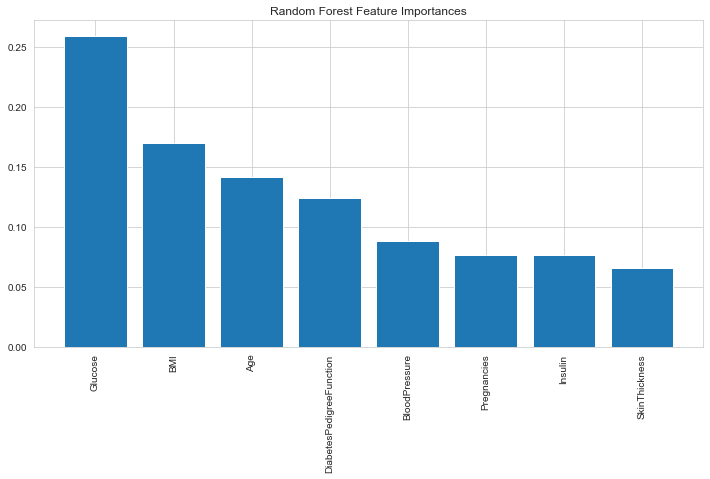

In [32]:
feature_importances_rf = clf_rf.feature_importances_
indices_rf = feature_importances_rf.argsort()[::-1]
feature_names_rf = X_rf.columns[indices_rf]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_rf.shape[1]), feature_importances_rf[indices_rf])
plt.xticks(range(X_rf.shape[1]), feature_names_rf, rotation=90)
plt.show()

## Permutation Importance

Glucose: 0.0968
BMI: 0.0110
DiabetesPedigreeFunction: 0.0006
Insulin: -0.0071
Age: -0.0091
Pregnancies: -0.0162
SkinThickness: -0.0182
BloodPressure: -0.0221



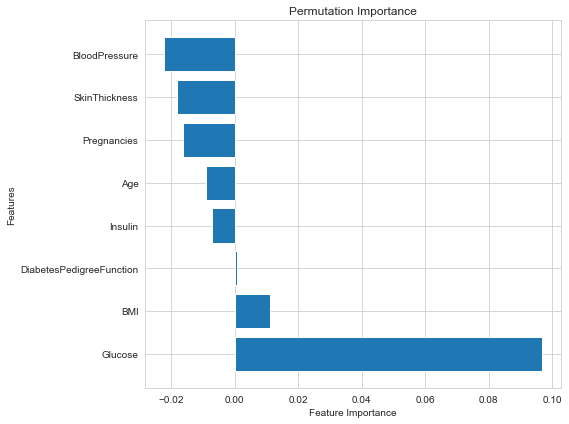

<Figure size 576x432 with 1 Axes>

In [ ]:
# permutation importance
result_rf = permutation_importance(clf_rf, X_test_rf, y_test_rf, n_repeats=10, random_state=42)

# Get feature importance scores
importance_scores_rf = result_rf.importances_mean

# Sort features by importance score in descending order
sorted_indices_rf = np.argsort(importance_scores_rf)[::-1]
sorted_features_rf = X_rf.columns[sorted_indices_rf]
sorted_scores_rf = importance_scores_rf[sorted_indices_rf]

# Print feature importance
for feature_rf, score_rf in zip(sorted_features_rf, sorted_scores_rf):
    print("{}: {:.4f}".format(feature_rf, score_rf))

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(sorted_features_rf, sorted_scores_rf)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

## SHAP

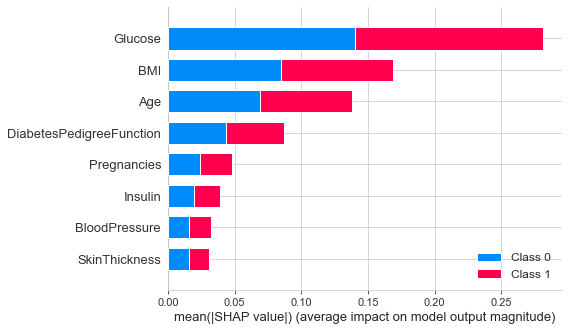

<Figure size 576x338.4 with 1 Axes>

In [ ]:
explainer_rf = shap.Explainer(clf_rf)
shap_values_rf = explainer_rf.shap_values(X_test_rf)
shap.summary_plot(shap_values_rf, X_test_rf, plot_type='bar')

<IPython.core.display.HTML object>

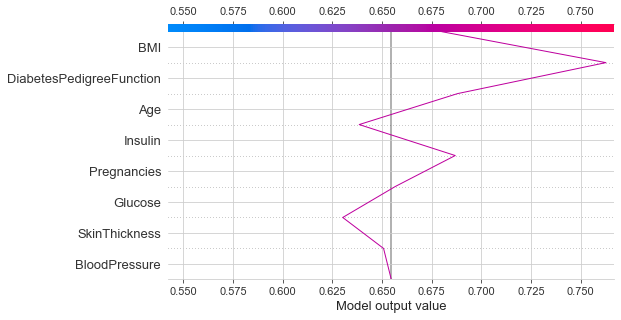

<Figure size 576x338.4 with 1 Axes>

<IPython.core.display.HTML object>

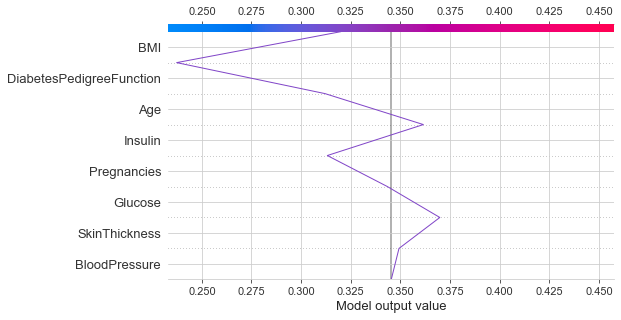

<Figure size 576x338.4 with 1 Axes>

In [ ]:
# Select the instance for generating the explanation
i_rf = 1
data_for_prediction_rf = X_test_rf.iloc[i_rf, :]

# Generate SHAP values 
shap_values_rf_local = explainer_rf.shap_values(data_for_prediction_rf)

# Set the class index for negative prediction
class_index_rf = 0  

# Access the expected value 
expected_value_negative_rf = explainer_rf.expected_value[class_index_rf]
shap_values_negative_rf = shap_values_rf_local[class_index_rf]

# Initialize the JS 
shap.initjs()

# Create the decision plot for the negative class
shap.decision_plot(expected_value_negative_rf, shap_values_negative_rf, feature_names=X_test_rf.columns.tolist())


# Positive Class
class_index_rf = 1  
expected_value_positive_rf = explainer_rf.expected_value[class_index_rf]
shap_values_positive_rf = shap_values_rf_local[class_index_rf]
shap.initjs()

# Create the decision plot 
shap.decision_plot(expected_value_positive_rf, shap_values_positive_rf, feature_names=X_test_rf.columns.tolist())

## ALE 

                  eff  size
Pregnancies                
0           -0.029221   0.0
1           -0.029221  39.0
2           -0.029221  28.0
3           -0.029221  11.0
4           -0.029221  16.0
5            0.054113  12.0
6            0.054113   6.0
7            0.054113  10.0
8            0.054113  10.0
9            0.054113   6.0
10           0.054113   5.0
11           0.054113   3.0
12           0.054113   4.0
13           0.054113   4.0
              eff  size
Glucose                
62      -0.156277   0.0
73      -0.156277   4.0
74      -0.156277   3.0
78      -0.156277   3.0
81      -0.156277   3.0
84      -0.156277   5.0
85      -0.156277   2.0
87      -0.156277   2.0
89      -0.156277   3.0
91      -0.156277   4.0
92      -0.156277   3.0
93      -0.156277   2.0
95      -0.156277   4.0
96      -0.156277   3.0
98      -0.156277   2.0
100     -0.156277   3.0
102     -0.156277   3.0
104     -0.156277   7.0
105     -0.156277   3.0
107     -0.156277   3.0
109     -0.156277   7.0


PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


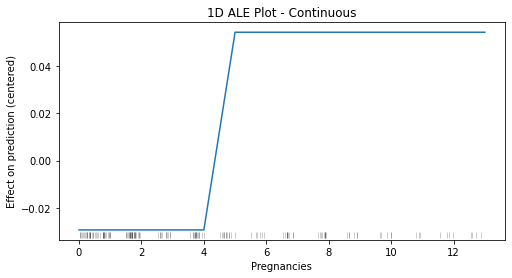

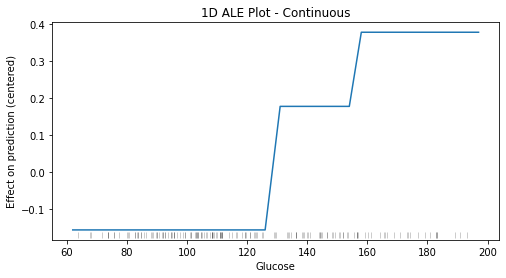

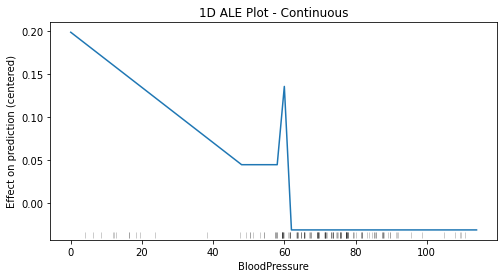

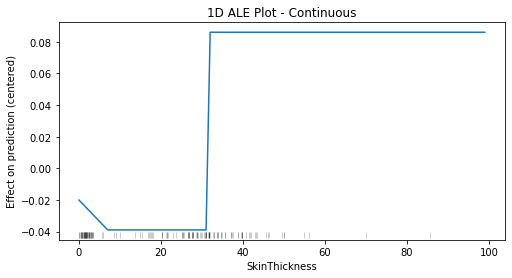

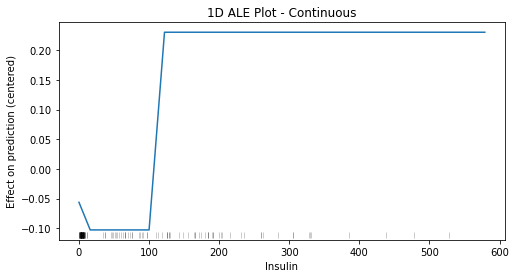

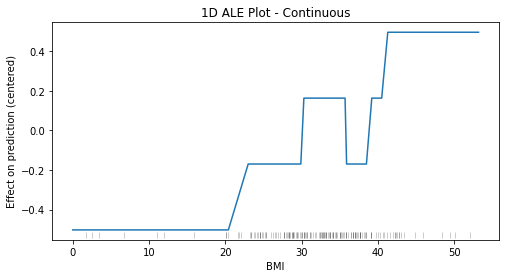

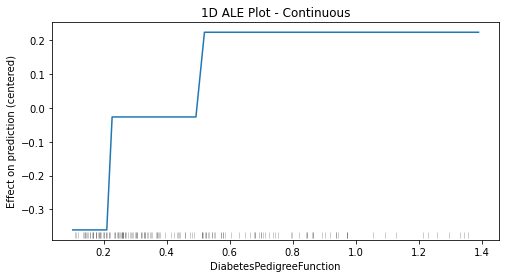

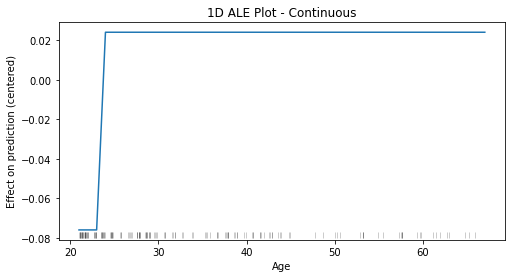

In [11]:
for feature in X_test_rf.columns:
    ale_eff_rf = ale(X=X_test_rf, model=clf_rf, feature=[feature], grid_size=50, include_CI=False)
    print(ale_eff_rf)

## PDP 

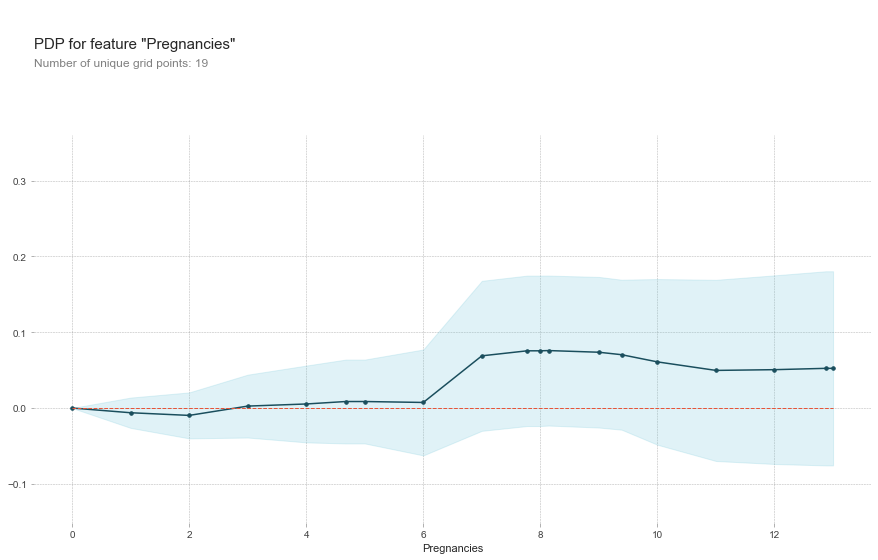

<Figure size 1080x684 with 2 Axes>

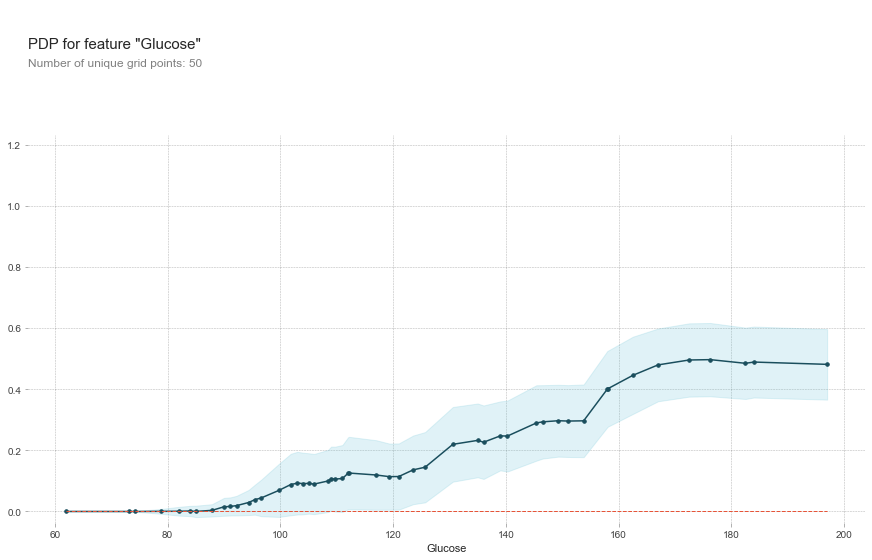

<Figure size 1080x684 with 2 Axes>

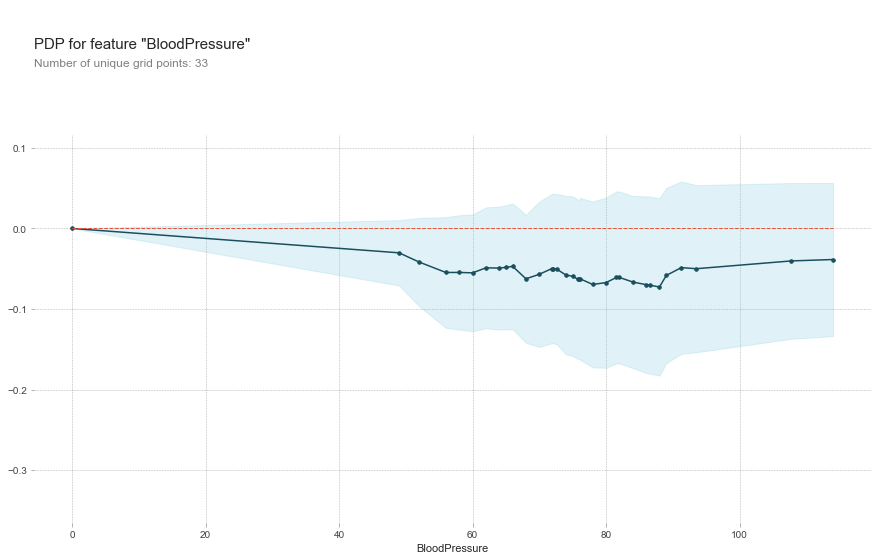

<Figure size 1080x684 with 2 Axes>

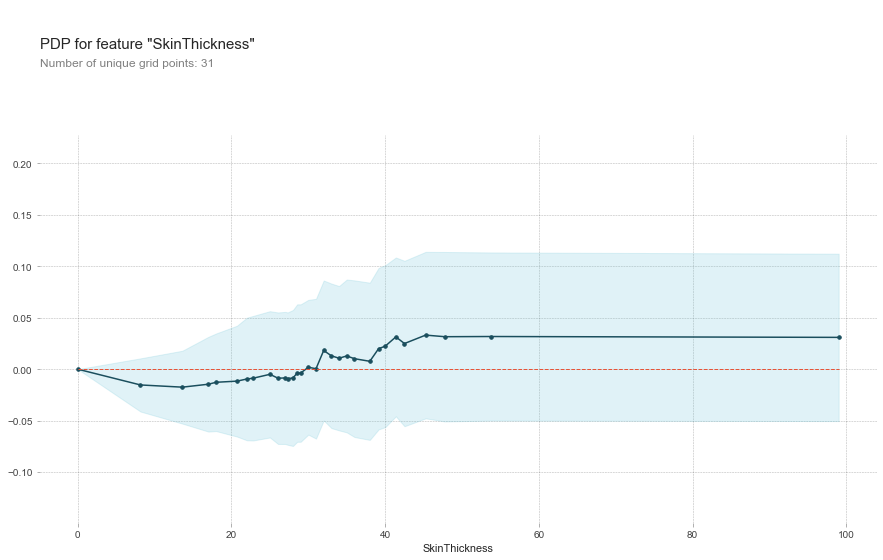

<Figure size 1080x684 with 2 Axes>

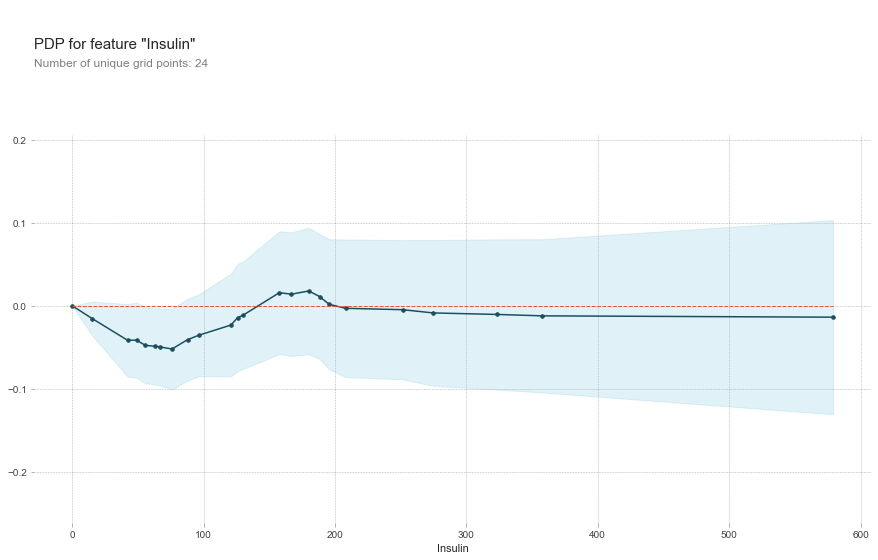

<Figure size 1080x684 with 2 Axes>

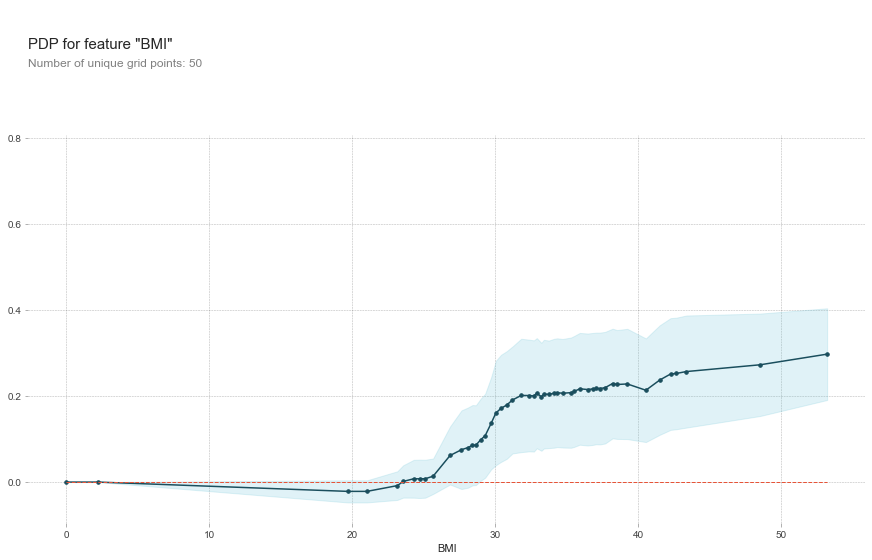

<Figure size 1080x684 with 2 Axes>

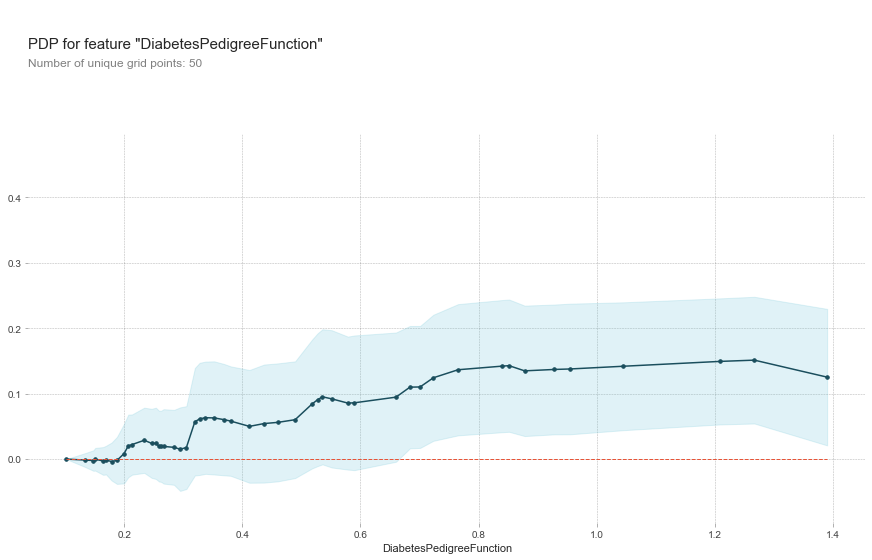

<Figure size 1080x684 with 2 Axes>

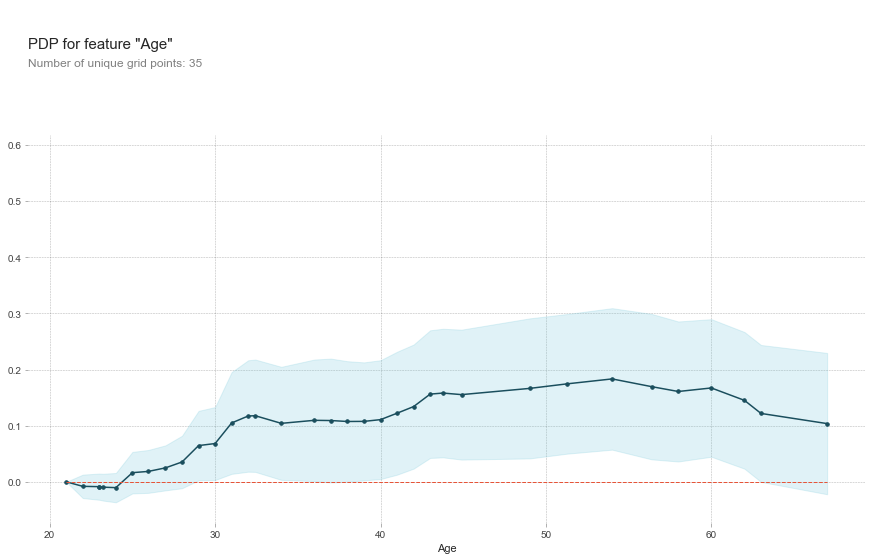

<Figure size 1080x684 with 2 Axes>

In [ ]:
# Iterate over each feature and plot the pdp curve
for feature_name in X_test_rf.columns:
    # Calculate pdp data
    pdp_data_rf_all = pdp.pdp_isolate(model=clf_rf, dataset=X_test_rf, model_features=X_test_rf.columns, feature=feature_name,num_grid_points = 50)

    # Plot pdp curve
    pdp.pdp_plot(pdp_data_rf_all, feature_name)
    plt.show()

# KNN

In [13]:
X_knn = df.drop(['Outcome'], axis=1) 
y_knn = df['Outcome']


X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Create a kNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=10)


clf_knn.fit(X_train_knn, y_train_knn)

# Make predictions on the testing set
y_pred_knn = clf_knn.predict(X_test_knn)



accuracy_score_knn= metrics.accuracy_score(y_test_knn, y_pred_knn)
print('accuracy score is', str('{:04.2f}'.format(accuracy_score_knn*100))+'%')

accuracy score is 76.62%


## Permutation Importance 

Glucose: 0.1597
Age: 0.0351
Insulin: 0.0325
BloodPressure: 0.0318
SkinThickness: 0.0299
BMI: 0.0117
Pregnancies: 0.0104
DiabetesPedigreeFunction: 0.0000



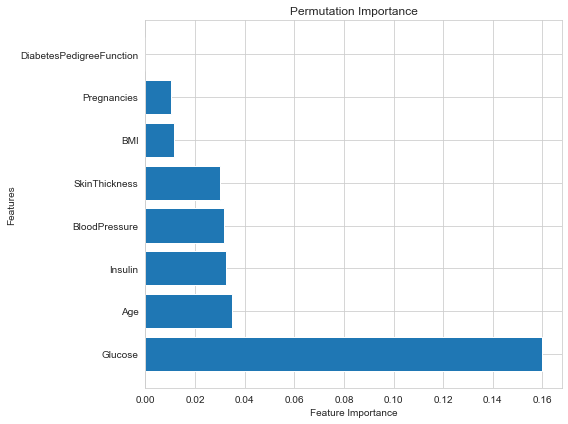

<Figure size 576x432 with 1 Axes>

In [ ]:
# Perform permutation importance
result_knn = permutation_importance(clf_knn, X_test_knn, y_test_knn, n_repeats=10, random_state=42)

# Get feature importance scores
importance_scores_knn = result_knn.importances_mean

# Sort features by importance score in descending order
sorted_indices_knn = np.argsort(importance_scores_knn)[::-1]
sorted_features_knn = X_knn.columns[sorted_indices_knn]
sorted_scores_knn = importance_scores_knn[sorted_indices_knn]

# Print feature importance
for feature_knn, score_knn in zip(sorted_features_knn, sorted_scores_knn):
    print("{}: {:.4f}".format(feature_knn, score_knn))

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(sorted_features_knn, sorted_scores_knn)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.




  0%|          | 0/154 [00:00<?, ?it/s]

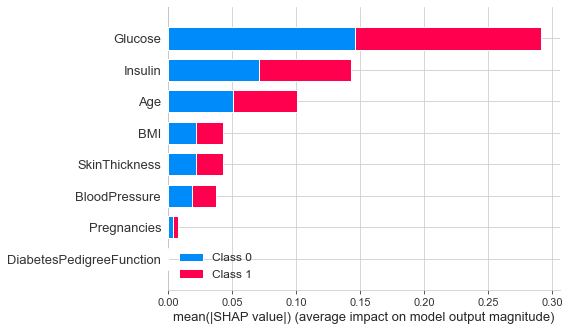

<Figure size 576x338.4 with 1 Axes>

In [ ]:
explainer_knn = shap.KernelExplainer(clf_knn.predict_proba, X_train_knn)
shap_values_knn = explainer_knn.shap_values(X_test_knn)
shap.summary_plot(shap_values_knn, X_test_knn, plot_type='bar')

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.






<IPython.core.display.HTML object>

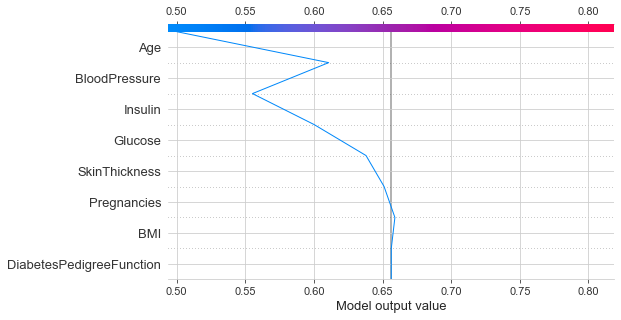

<Figure size 576x338.4 with 1 Axes>

<IPython.core.display.HTML object>

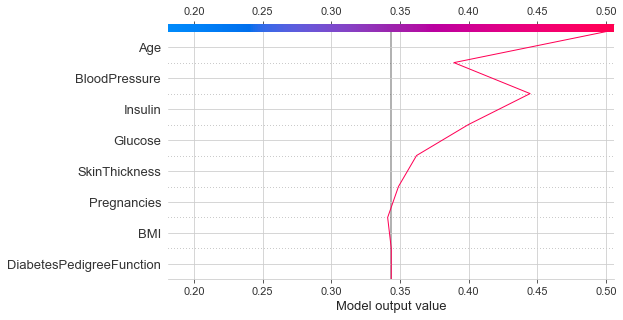

<Figure size 576x338.4 with 1 Axes>

In [ ]:
np.random.seed(36)

explainer_knn = shap.KernelExplainer(clf_knn.predict_proba, X_train_knn)

# Negative Class
# Select the instance for generating the explanation
i_knn = 4
data_for_prediction_knn = X_test_knn.iloc[i_knn, :]

# Generate SHAP values for the instance
shap_values_knn = explainer_knn.shap_values(data_for_prediction_knn)

# Set the class index for negative prediction
class_index_knn = 0  

# Access the expected value for the negative class
expected_value_negative_knn = explainer_knn.expected_value[class_index_knn]

# Access the SHAP values for the "negative" class
shap_values_negative_knn = shap_values_knn[class_index_knn]

# Initialize the JS visualization
shap.initjs()



#Positive Class
shap.decision_plot(expected_value_negative_knn, shap_values_negative_knn, feature_names=X_test_knn.columns.tolist())
class_index_knn = 1  
expected_value_positive_knn = explainer_knn.expected_value[class_index_knn]
shap_values_positive_knn = shap_values_knn[class_index_knn]
shap.initjs()

# Create the decision plot 
shap.decision_plot(expected_value_positive_knn, shap_values_positive_knn, feature_names=X_test_knn.columns.tolist())



## ALE 

                  eff  size
Pregnancies                
0           -0.022394   0.0
1            0.003247  39.0
2            0.003247  28.0
3            0.003247  11.0
4            0.003247  16.0
5            0.003247  12.0
6            0.003247   6.0
7            0.003247  10.0
8            0.003247  10.0
9            0.003247   6.0
10           0.003247   5.0
11           0.003247   3.0
12           0.003247   4.0
13           0.003247   4.0
              eff  size
Glucose                
62      -0.447727   0.0
73      -0.447727   4.0
74      -0.447727   3.0
78      -0.447727   3.0
81      -0.447727   3.0
84      -0.447727   5.0
85      -0.447727   2.0
87      -0.447727   2.0
89      -0.447727   3.0
91      -0.447727   4.0
92      -0.447727   3.0
93      -0.447727   2.0
95      -0.447727   4.0
96      -0.447727   3.0
98      -0.447727   2.0
100     -0.447727   3.0
102     -0.447727   3.0
104     -0.304870   7.0
105     -0.304870   3.0
107     -0.304870   3.0
109     -0.304870   7.0


PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


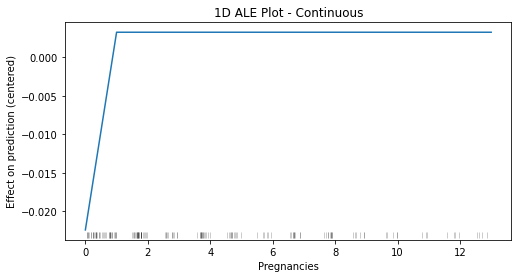

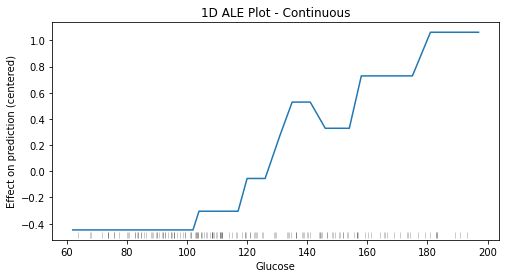

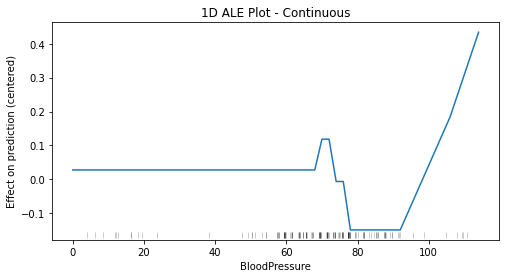

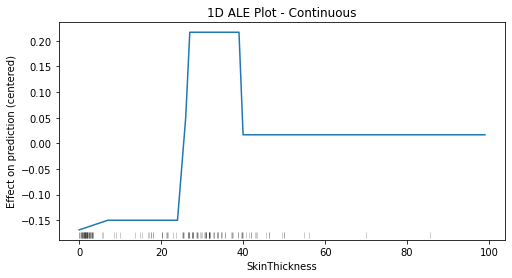

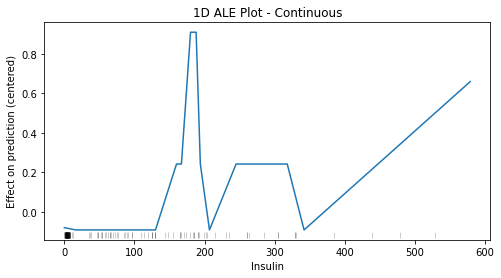

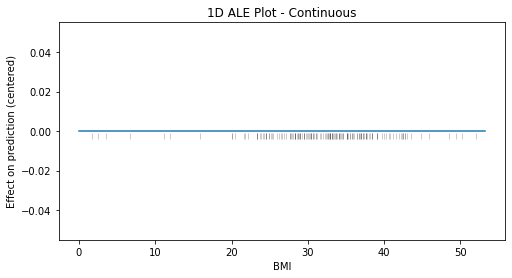

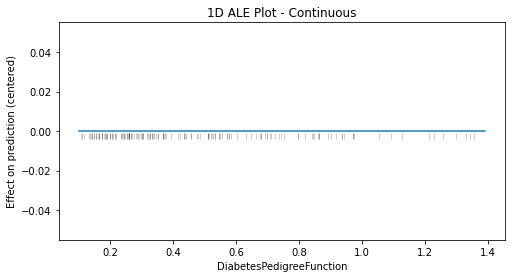

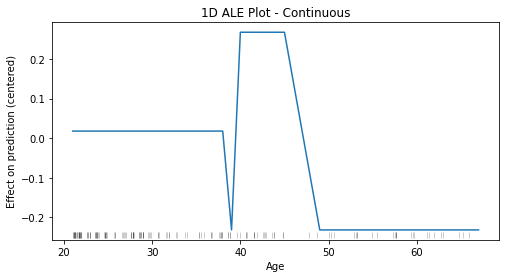

In [14]:
for feature in X_test_knn.columns:
    ale_eff_knn = ale(X=X_test_knn, model=clf_knn, feature=[feature], grid_size=50, include_CI=False)
    print(ale_eff_knn)

## PDP

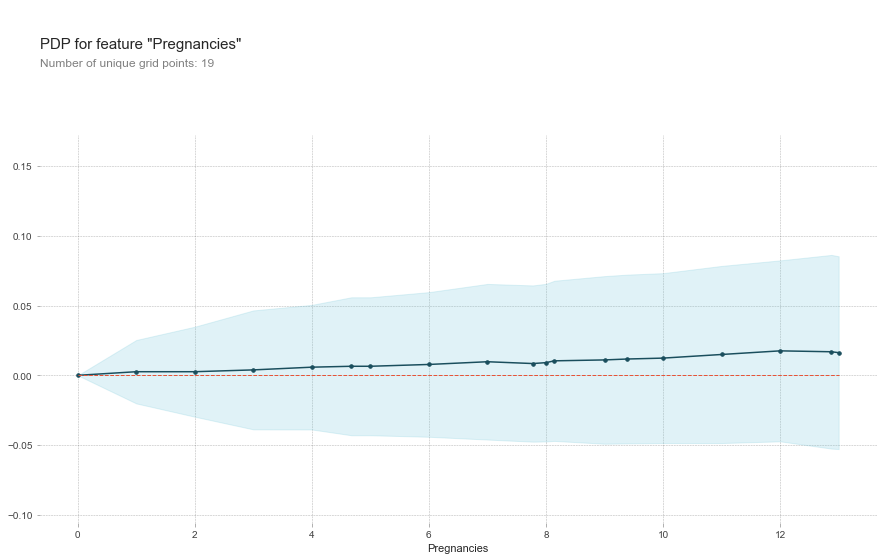

<Figure size 1080x684 with 2 Axes>

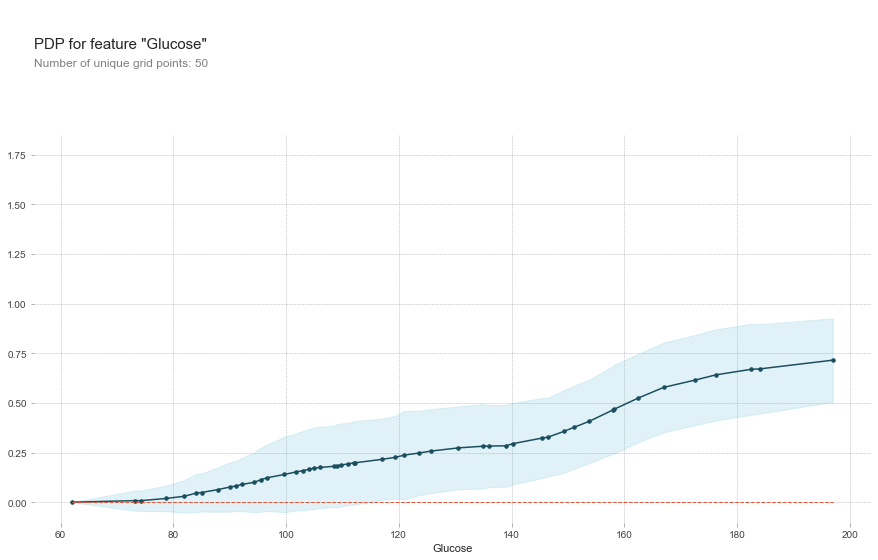

<Figure size 1080x684 with 2 Axes>

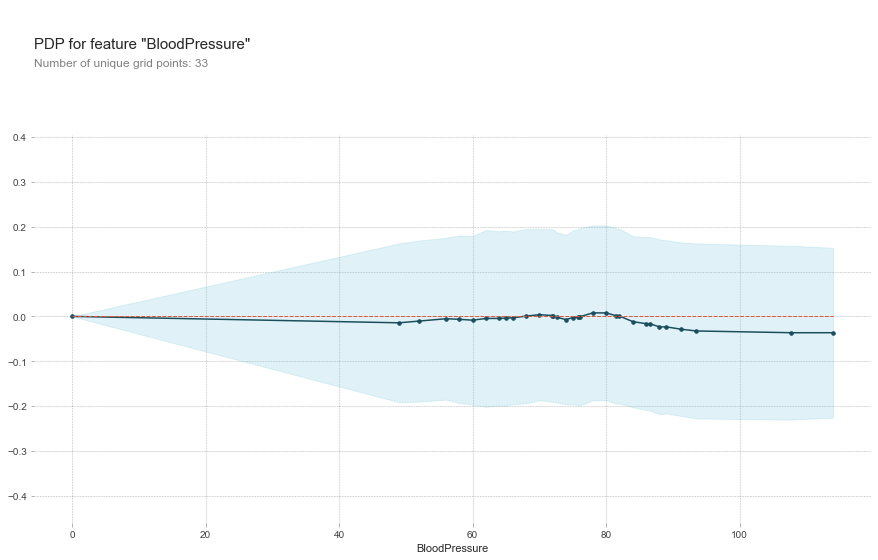

<Figure size 1080x684 with 2 Axes>

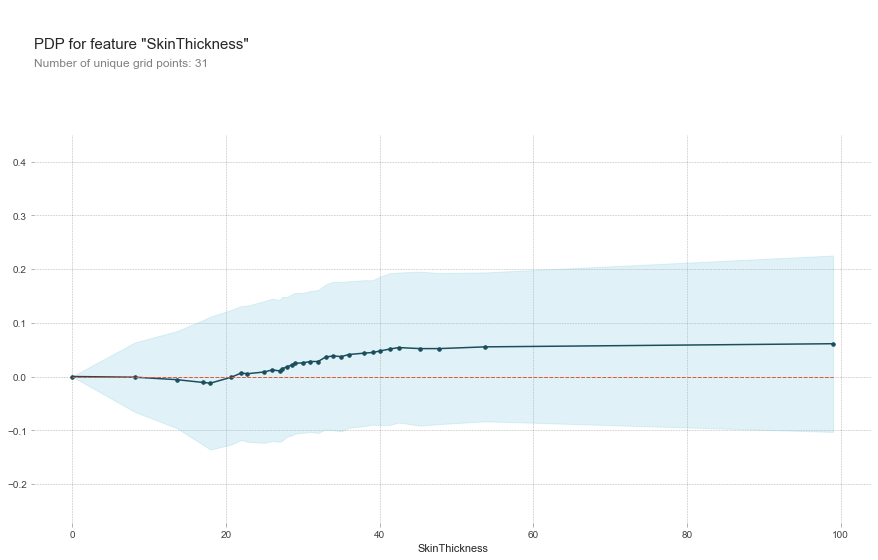

<Figure size 1080x684 with 2 Axes>

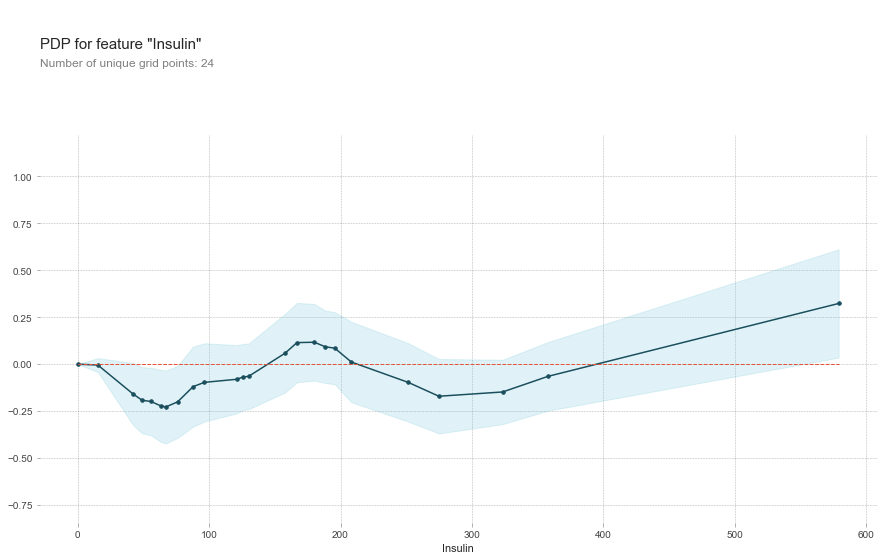

<Figure size 1080x684 with 2 Axes>

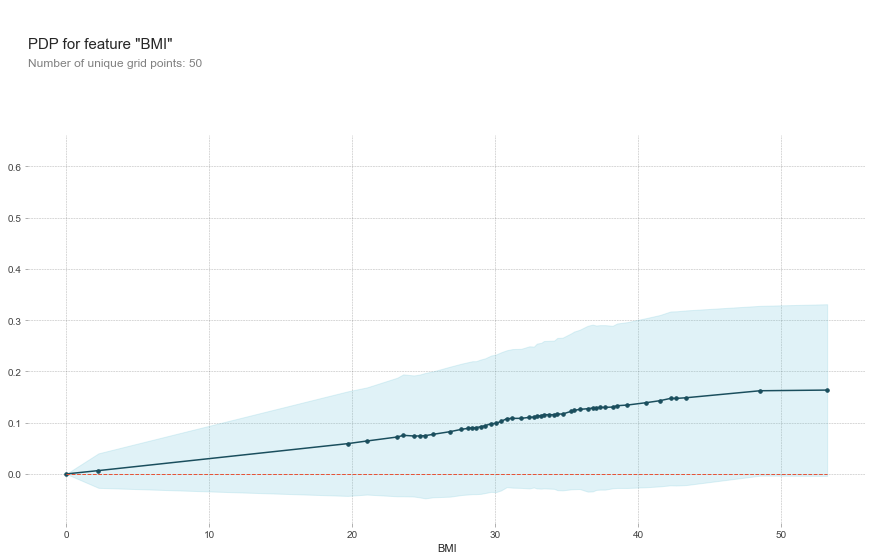

<Figure size 1080x684 with 2 Axes>

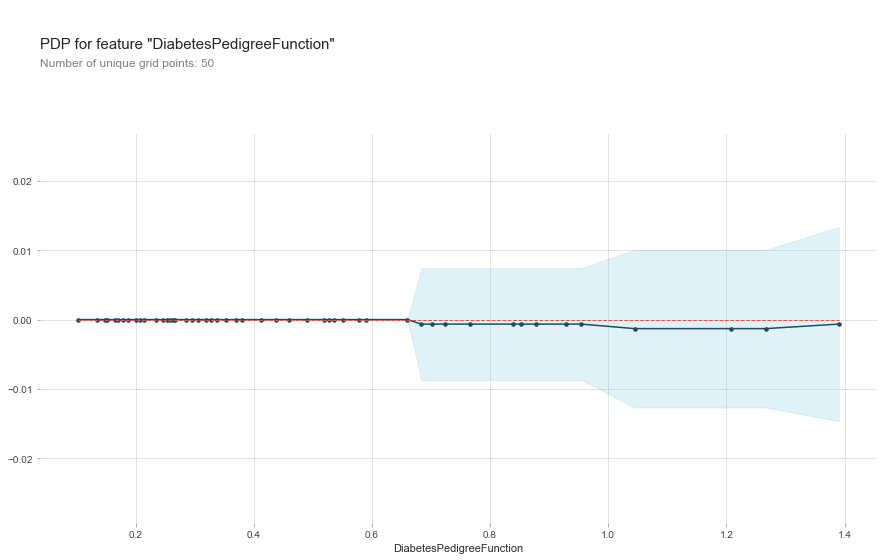

<Figure size 1080x684 with 2 Axes>

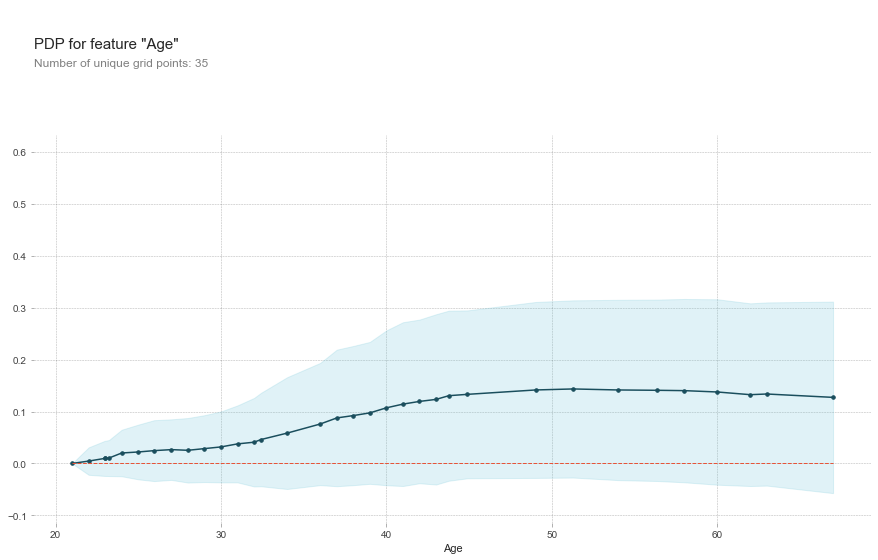

<Figure size 1080x684 with 2 Axes>

In [ ]:
# Iterate over each feature and plot the pdp curve
for feature_name in X_test_knn.columns:
    # Calculate pdp data
    pdp_data_knn_all = pdp.pdp_isolate(model=clf_knn, dataset=X_test_knn, model_features=X_test_knn.columns, feature=feature_name,num_grid_points = 50)

    # Plot pdp curve
    pdp.pdp_plot(pdp_data_knn_all, feature_name)
    plt.show()

# Multi-Layer Perceptron (MLP) neural network

In [15]:
# Split the dataset into features (X) and target (y)
X_mlp = df.drop(['Outcome'], axis=1) 
y_mlp = df['Outcome']

# Split the data into training and test sets
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_mlp, y_mlp, test_size=0.3, random_state=42)

# Train the MLP classifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                    solver='adam', tol=1e-4, random_state=12)
clf_mlp.fit(X_train_mlp, y_train_mlp)


y_pred_mlp = clf_mlp.predict(X_test_mlp)

# Evaluate the accuracy 
accuracy_mlp = accuracy_score(y_test_mlp, y_pred_mlp)
print("Accuracy: {:.2f}%".format(accuracy_mlp*100))

Accuracy: 72.73%


## Permutation importance 

Glucose: 0.1173
Age: 0.0710
Insulin: 0.0606
SkinThickness: 0.0407
BloodPressure: 0.0251
BMI: 0.0195
Pregnancies: 0.0108
DiabetesPedigreeFunction: 0.0069



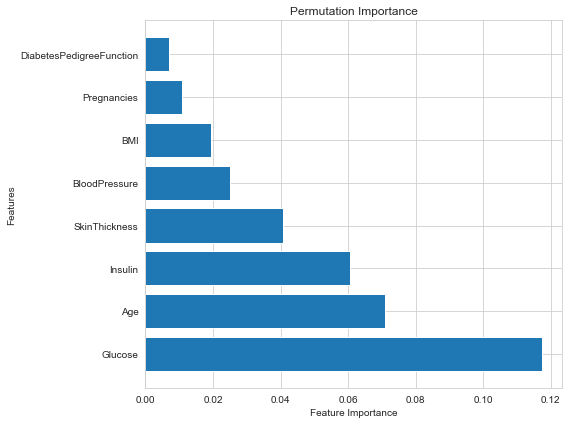

<Figure size 576x432 with 1 Axes>

In [ ]:
# Perform permutation importance
result_mlp = permutation_importance(clf_mlp, X_test_mlp, y_test_mlp, n_repeats=10, random_state=42)

# Get feature importance scores
importance_scores_mlp = result_mlp.importances_mean

# Sort features by importance score in descending order
sorted_indices_mlp = np.argsort(importance_scores_mlp)[::-1]
sorted_features_mlp = X_mlp.columns[sorted_indices_mlp]
sorted_scores_mlp = importance_scores_mlp[sorted_indices_mlp]

# Print feature importance
for feature_mlp, score_mlp in zip(sorted_features_mlp, sorted_scores_mlp):
    print("{}: {:.4f}".format(feature_mlp, score_mlp))

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(sorted_features_mlp, sorted_scores_mlp)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

## SHAP 

Using 537 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.




  0%|          | 0/231 [00:00<?, ?it/s]

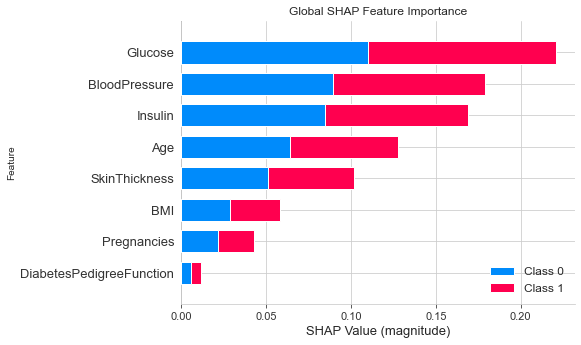

<Figure size 576x338.4 with 1 Axes>

In [ ]:
# Create a KernelExplainer 
explainer = shap.KernelExplainer(clf_mlp.predict_proba, X_train_mlp)

# Calculate SHAP values for all features
shap_values = explainer.shap_values(X_test_mlp)

# Plot the global SHAP summary plot
shap.summary_plot(shap_values, X_test_mlp, plot_type="bar", show=False)

# Set plot parameters
plt.title("Global SHAP Feature Importance")
plt.xlabel("SHAP Value (magnitude)")
plt.ylabel("Feature")

# Show the plot
plt.show()

Using 537 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.






<IPython.core.display.HTML object>

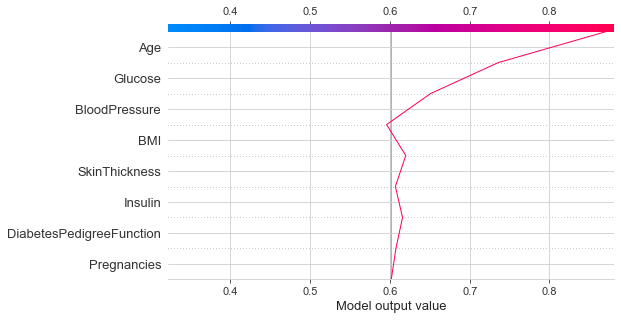

<Figure size 576x338.4 with 1 Axes>

<IPython.core.display.HTML object>

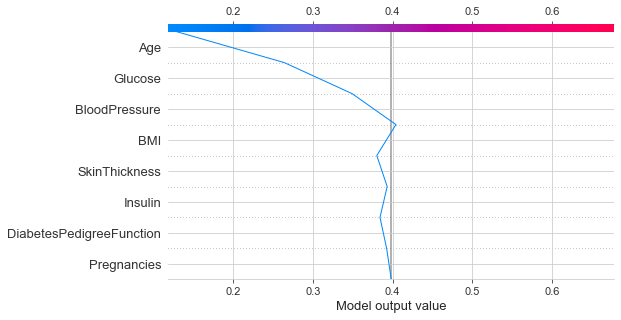

<Figure size 576x338.4 with 1 Axes>

In [ ]:
np.random.seed(36)
# Create explainer
explainer_mlp = shap.KernelExplainer(clf_mlp.predict_proba, X_train_mlp)

# Select the instance for generating the explanation
i_mlp = 1
data_for_prediction_mlp = X_test_mlp.iloc[i_mlp, :]

# Generate SHAP values for the instance
shap_values_mlp = explainer_mlp.shap_values(data_for_prediction_mlp)

# Set the class index for negative prediction
class_index_mlp = 0  

# Access the expected value for the negative class
expected_value_negative_mlp = explainer_mlp.expected_value[class_index_mlp]

# Access the SHAP values for the "negative" class
shap_values_negative_mlp = shap_values_mlp[class_index_mlp]

# Initialize the JS visualization
shap.initjs()



# positive class
shap.decision_plot(expected_value_negative_mlp, shap_values_negative_mlp, feature_names=X_test_mlp.columns.tolist())
class_index_mlp = 1  
expected_value_positive_mlp = explainer_mlp.expected_value[class_index_mlp]
shap_values_positive_mlp = shap_values_mlp[class_index_mlp]
shap.initjs()

# Create the decision plot 
shap.decision_plot(expected_value_positive_mlp, shap_values_positive_mlp, feature_names=X_test_mlp.columns.tolist())

## ALE 

                  eff  size
Pregnancies                
0            0.013609   0.0
1            0.044859  64.0
2            0.044859  38.0
3            0.044859  21.0
4            0.001380  23.0
5           -0.065286  15.0
6           -0.065286  11.0
7           -0.065286  14.0
8           -0.065286  12.0
9           -0.065286   9.0
10          -0.065286   7.0
11          -0.065286   5.0
12          -0.065286   5.0
13          -0.065286   7.0
              eff  size
Glucose                
61      -0.154298   0.0
73      -0.154298   5.0
77      -0.154298   6.0
80      -0.154298   6.0
81      -0.154298   2.0
83      -0.154298   4.0
84      -0.154298   5.0
87      -0.154298   6.0
88      -0.154298   3.0
91      -0.154298   6.0
92      -0.154298   3.0
95      -0.154298   7.0
96      -0.154298   3.0
99      -0.154298   5.0
100     -0.154298   6.0
102     -0.154298   7.0
104     -0.154298   8.0
105     -0.154298   4.0
106     -0.154298   4.0
107     -0.154298   2.0
109     -0.154298  10.0


PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


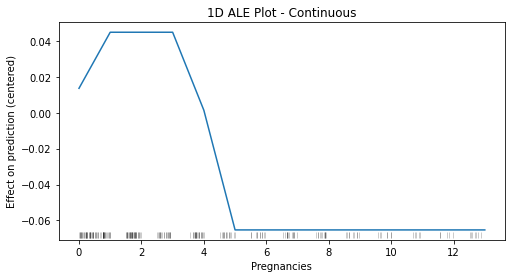

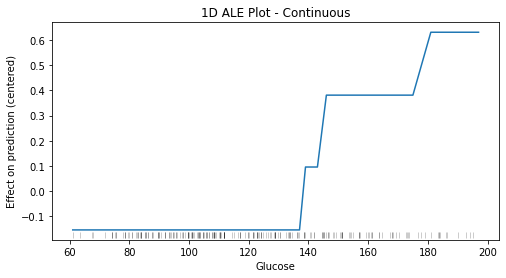

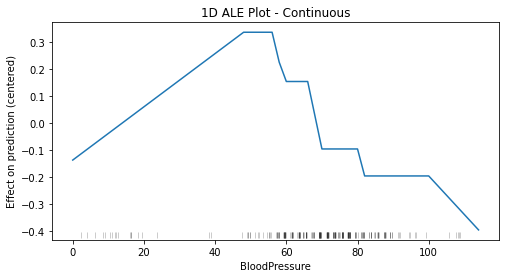

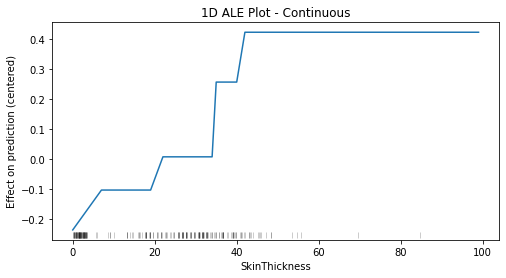

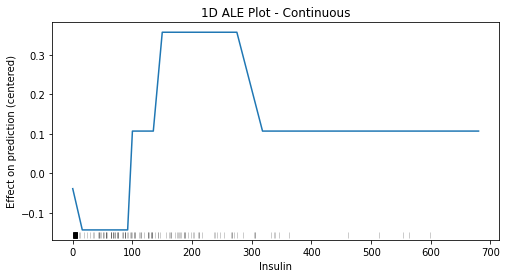

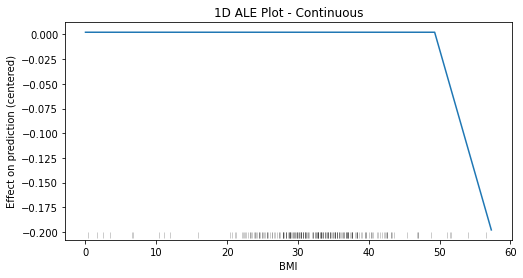

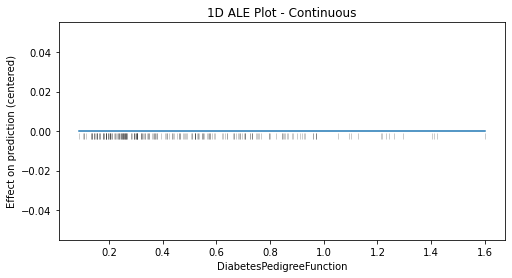

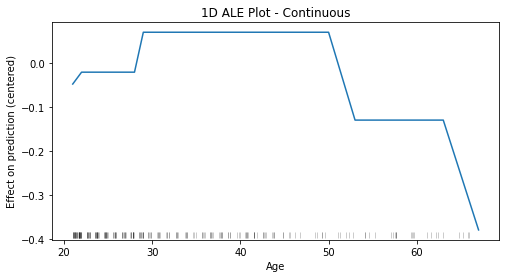

In [16]:
for feature in X_test_mlp.columns:
    ale_eff_mlp = ale(X=X_test_mlp, model=clf_mlp, feature=[feature], grid_size=50, include_CI=False)
    print(ale_eff_mlp)

## PDP 

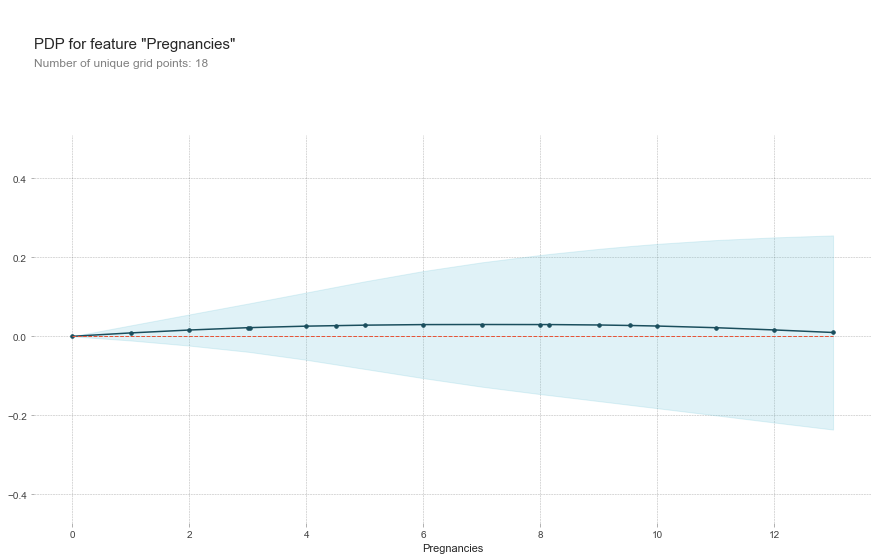

<Figure size 1080x684 with 2 Axes>

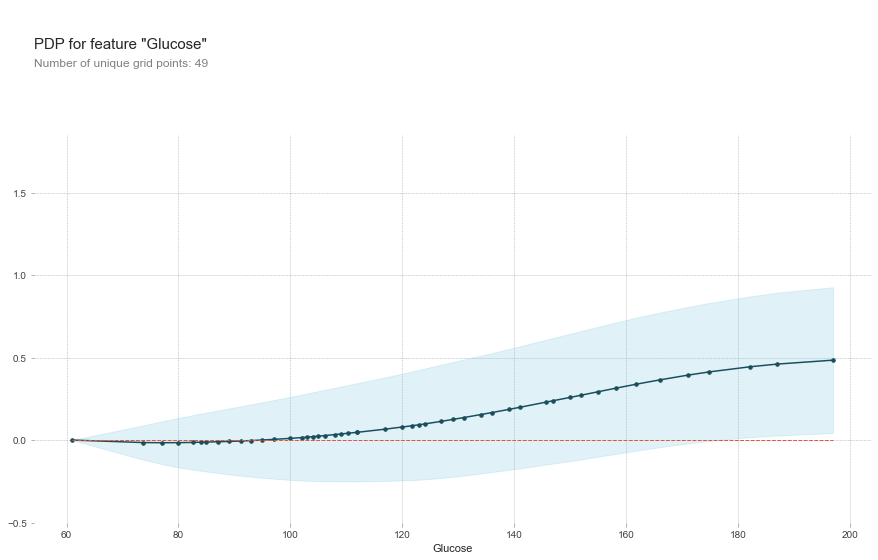

<Figure size 1080x684 with 2 Axes>

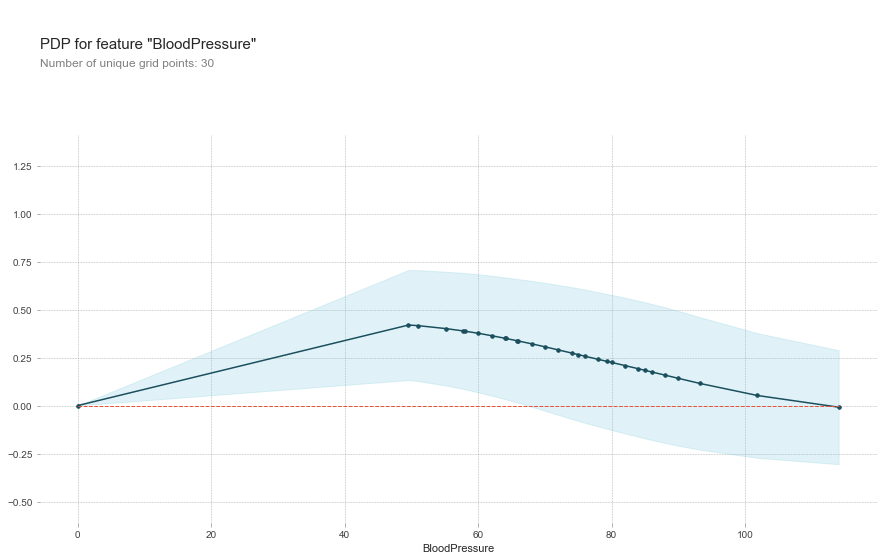

<Figure size 1080x684 with 2 Axes>

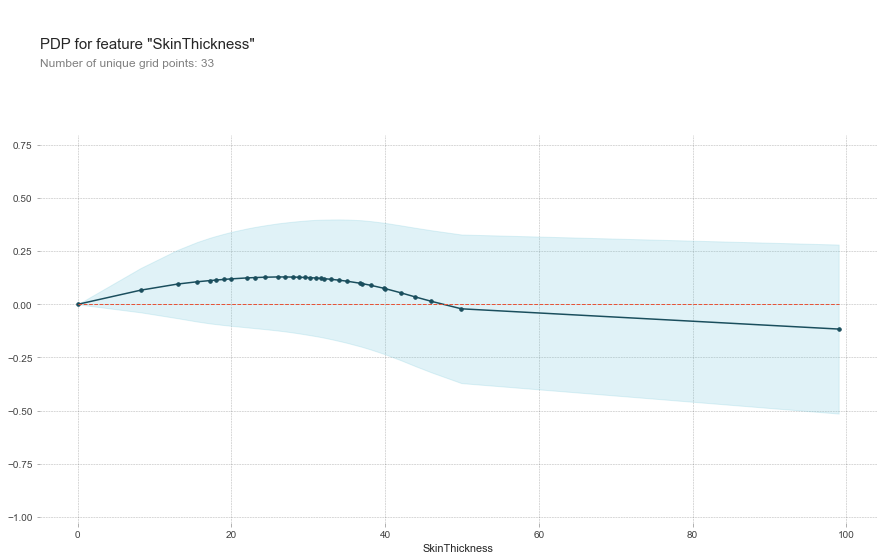

<Figure size 1080x684 with 2 Axes>

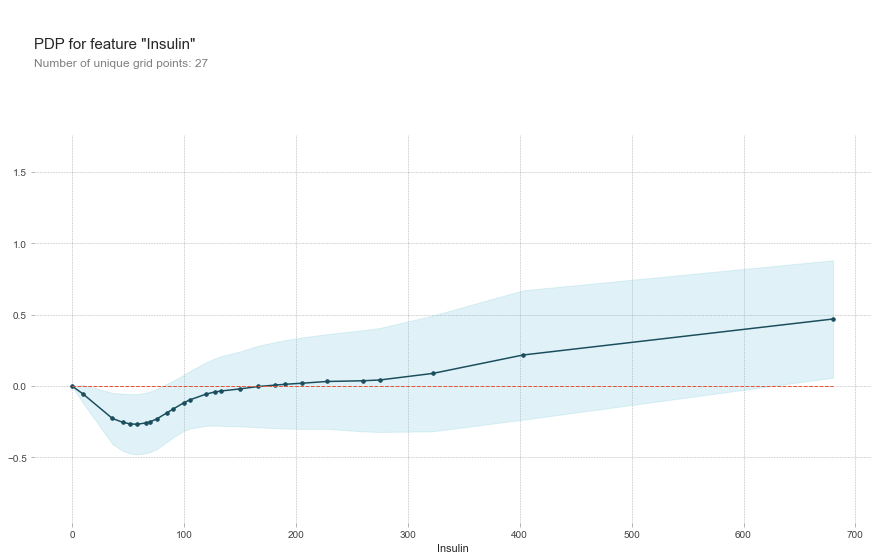

<Figure size 1080x684 with 2 Axes>

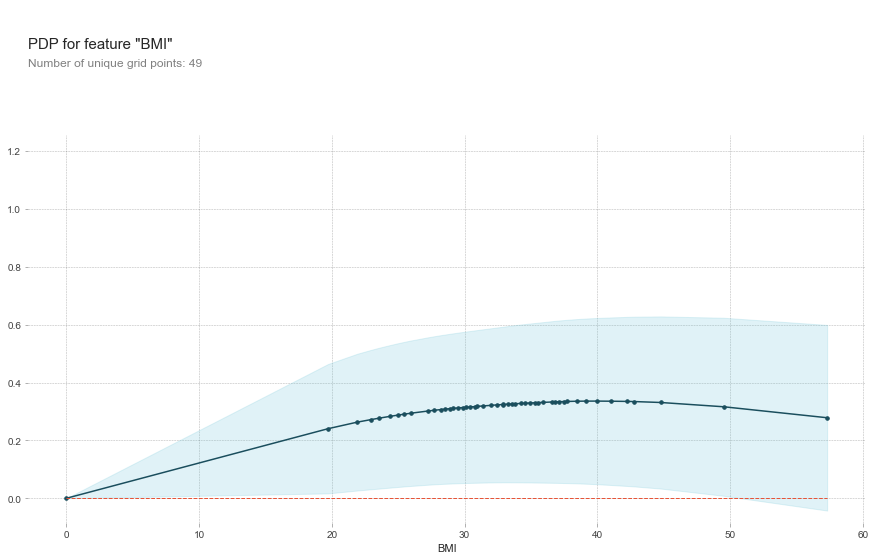

<Figure size 1080x684 with 2 Axes>

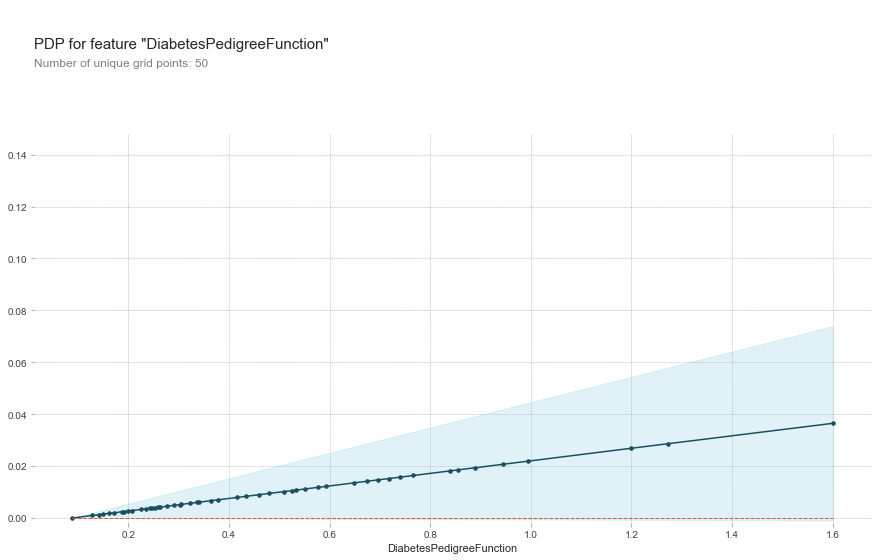

<Figure size 1080x684 with 2 Axes>

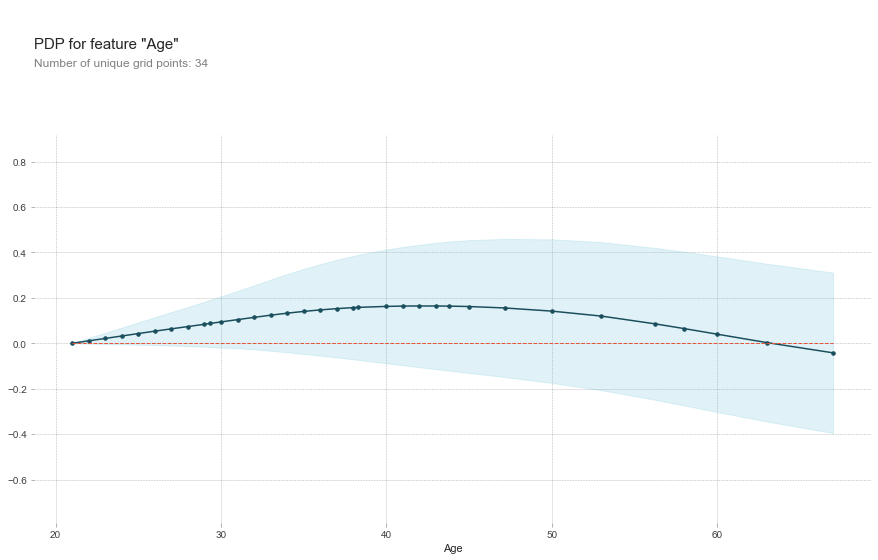

<Figure size 1080x684 with 2 Axes>

In [ ]:
# Iterate over each feature and plot the pdp curve
for feature_name in X_test_mlp.columns:
    # Calculate pdp data
    pdp_data_mlp_all = pdp.pdp_isolate(model=clf_mlp, dataset=X_test_mlp, model_features=X_test_mlp.columns, feature=feature_name,num_grid_points = 50)

    # Plot pdp curve
    pdp.pdp_plot(pdp_data_mlp_all, feature_name)
    plt.show()

# SVM

In [17]:
# Split the dataset into features (X) and target (y)
X_svm = df.drop(['Outcome'], axis=1) 
y_svm = df['Outcome']

# Split the dataset into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

# Scale the features
scaler_svm = StandardScaler()
X_train_svm = pd.DataFrame(scaler_svm.fit_transform(X_train_svm), columns=X_train_svm.columns)
X_test_svm = pd.DataFrame(scaler_svm.transform(X_test_svm), columns=X_test_svm.columns)

# Create an SVM classifier with a radial basis function (RBF) kernel
clf_svm = SVC(kernel='rbf', random_state=42, probability=True)

# Train the SVM classifier
clf_svm.fit(X_train_svm, y_train_svm)

# Make predictions on the testing set
y_pred_svm = clf_svm.predict(X_test_svm)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print("Accuracy: {:.2f}%".format(accuracy_svm * 100))

Accuracy: 74.46%


##  Permutation Importance

Glucose: 0.1173
BMI: 0.0316
Age: 0.0247
DiabetesPedigreeFunction: 0.0139
BloodPressure: 0.0061
Insulin: 0.0043
Pregnancies: 0.0022
SkinThickness: -0.0113



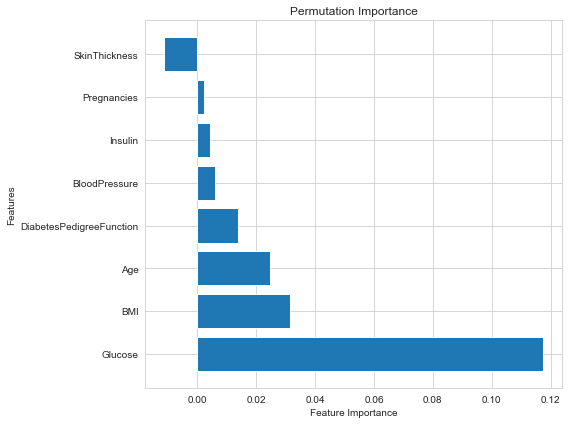

<Figure size 576x432 with 1 Axes>

In [ ]:
# Perform permutation importance
result_svm = permutation_importance(clf_svm, X_test_svm, y_test_svm, n_repeats=10, random_state=42)

# Get feature importance scores
importance_scores_svm = result_svm.importances_mean

# Sort features by importance score in descending order
sorted_indices_svm = np.argsort(importance_scores_svm)[::-1]
sorted_features_svm = X_svm.columns[sorted_indices_svm]
sorted_scores_svm = importance_scores_svm[sorted_indices_svm]

# Print feature importance
for feature_svm, score_svm in zip(sorted_features_svm, sorted_scores_svm):
    print("{}: {:.4f}".format(feature_svm, score_svm))

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(sorted_features_svm, sorted_scores_svm)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

## SHAP 

Using 537 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.




  0%|          | 0/231 [00:00<?, ?it/s]

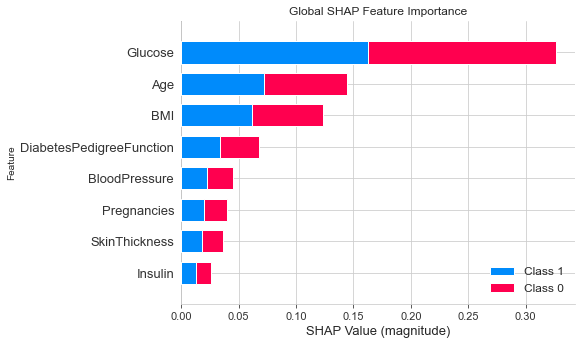

<Figure size 576x338.4 with 1 Axes>

In [ ]:
# Create a KernelExplainer 
explainer_svm = shap.KernelExplainer(clf_svm.predict_proba, X_train_svm)

# Calculate SHAP values for all features
shap_values_svm = explainer_svm.shap_values(X_test_svm)

# Plot the global SHAP summary plot
shap.summary_plot(shap_values_svm, X_test_svm, plot_type="bar", show=False)

# Set plot parameters
plt.title("Global SHAP Feature Importance")
plt.xlabel("SHAP Value (magnitude)")
plt.ylabel("Feature")

# Show the plot
plt.show()

Using 537 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.






<IPython.core.display.HTML object>

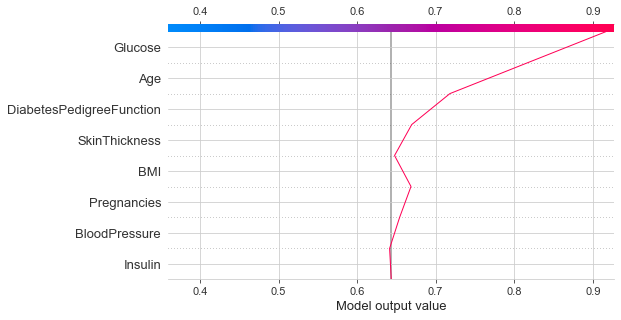

<Figure size 576x338.4 with 1 Axes>

<IPython.core.display.HTML object>

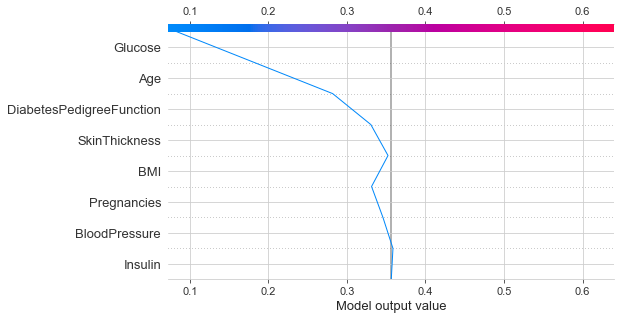

<Figure size 576x338.4 with 1 Axes>

In [ ]:
np.random.seed(36)
# Create explainer
explainer_svm = shap.KernelExplainer(clf_svm.predict_proba, X_train_svm)

# Select the instance for generating the explanation
i_svm = 1
data_for_prediction_svm = X_test_svm.iloc[i_svm, :]

# Generate SHAP values for the instance
shap_values_svm = explainer_svm.shap_values(data_for_prediction_svm)

# Set the class index for negative prediction
class_index_svm = 0  

# Access the expected value for the negative class
expected_value_negative_svm = explainer_svm.expected_value[class_index_svm]

# Access the SHAP values for the negative class
shap_values_negative_svm = shap_values_svm[class_index_svm]

# Initialize the JS visualization
shap.initjs()


# Positive Class
shap.decision_plot(expected_value_negative_svm, shap_values_negative_svm, feature_names=X_test_svm.columns.tolist())
class_index_svm = 1  
expected_value_positive_svm = explainer_svm.expected_value[class_index_svm]
shap_values_positive_svm = shap_values_svm[class_index_svm]
shap.initjs()

# Create the decision plot 
shap.decision_plot(expected_value_positive_svm, shap_values_positive_svm, feature_names=X_test_svm.columns.tolist())

## ALE 

                  eff  size
Pregnancies                
-1.143050    0.030425   0.0
-0.836294   -0.000825  64.0
-0.529539   -0.000825  38.0
-0.222783    0.046794  21.0
 0.083972    0.046794  23.0
 0.390728   -0.019872  15.0
 0.697483   -0.019872  11.0
 1.004239   -0.091301  14.0
 1.310994   -0.091301  12.0
 1.617750   -0.091301   9.0
 1.924505    0.051556   7.0
 2.231261    0.051556   5.0
 2.538016    0.051556   5.0
 2.844772   -0.091301   7.0
                eff  size
Glucose                  
-1.852376 -0.199443   0.0
-1.480967 -0.199443   5.0
-1.357164 -0.199443   6.0
-1.264312 -0.199443   6.0
-1.233361 -0.199443   2.0
-1.171460 -0.199443   4.0
-1.140509 -0.199443   5.0
-1.047657 -0.199443   6.0
-1.016706 -0.199443   3.0
-0.923854 -0.199443   6.0
-0.892903 -0.199443   3.0
-0.800051 -0.199443   7.0
-0.769100 -0.199443   3.0
-0.676248 -0.199443   5.0
-0.645297 -0.199443   6.0
-0.583396 -0.199443   7.0
-0.521494 -0.199443   8.0
-0.490543 -0.199443   4.0
-0.459593 -0.199443   4.0
-0.428

PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


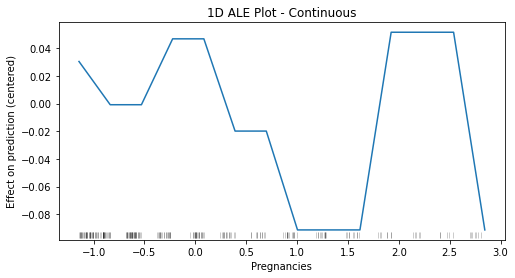

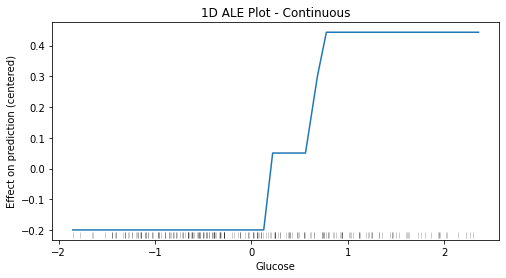

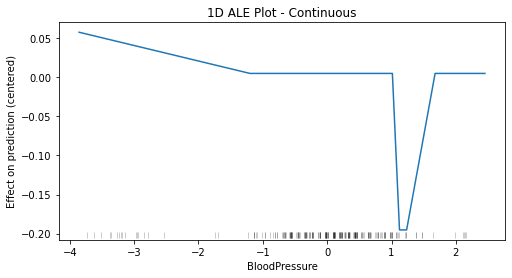

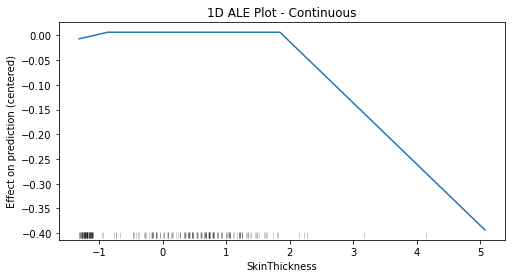

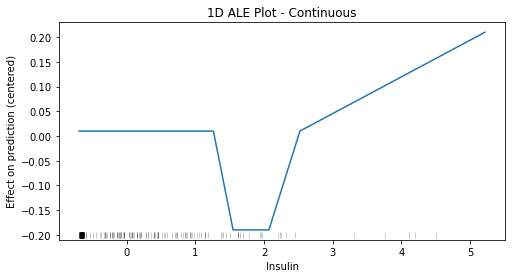

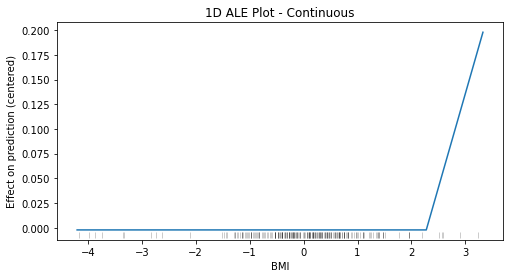

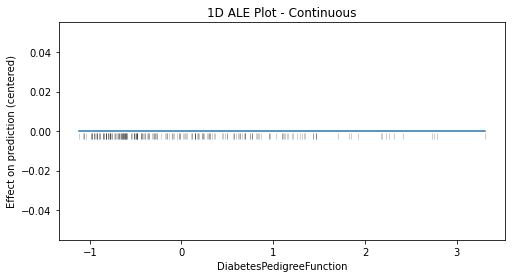

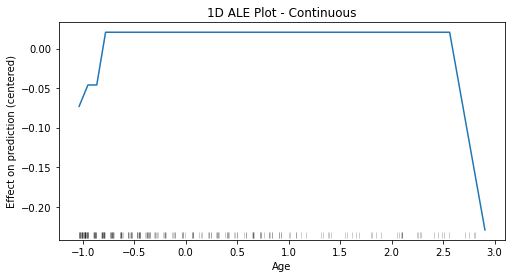

In [18]:
X_test_svm = pd.DataFrame(X_test_svm)

for feature in X_test_svm.columns:
    ale_eff_svm = ale(X=X_test_svm, model=clf_svm, feature=[feature], grid_size=50, include_CI=False)
    print(ale_eff_svm)

## PDP 

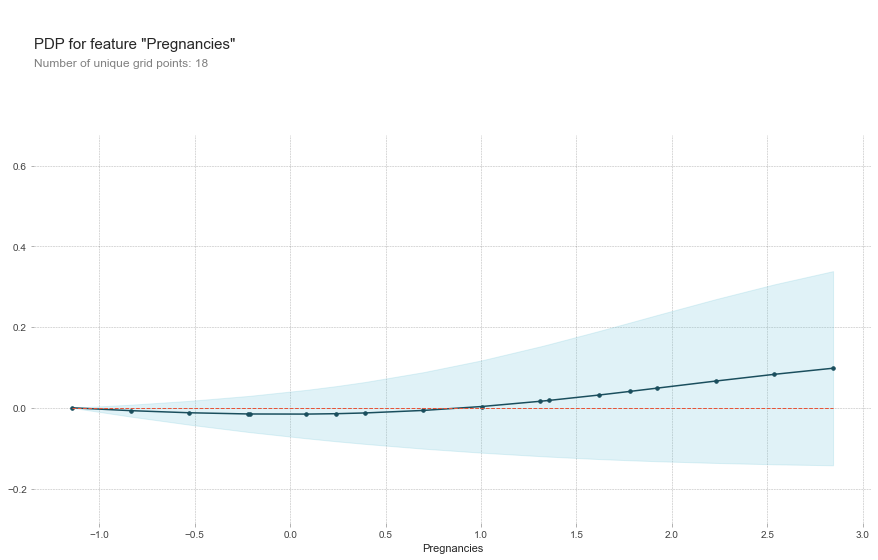

<Figure size 1080x684 with 2 Axes>

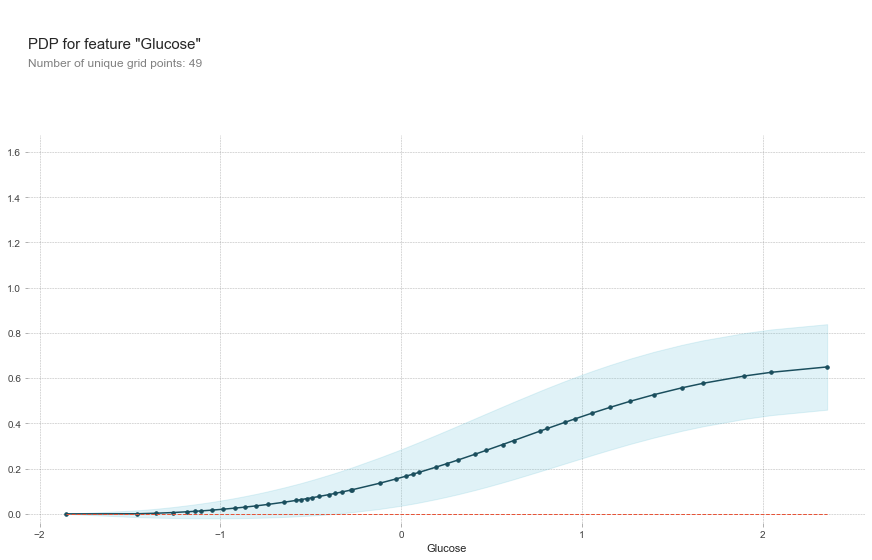

<Figure size 1080x684 with 2 Axes>

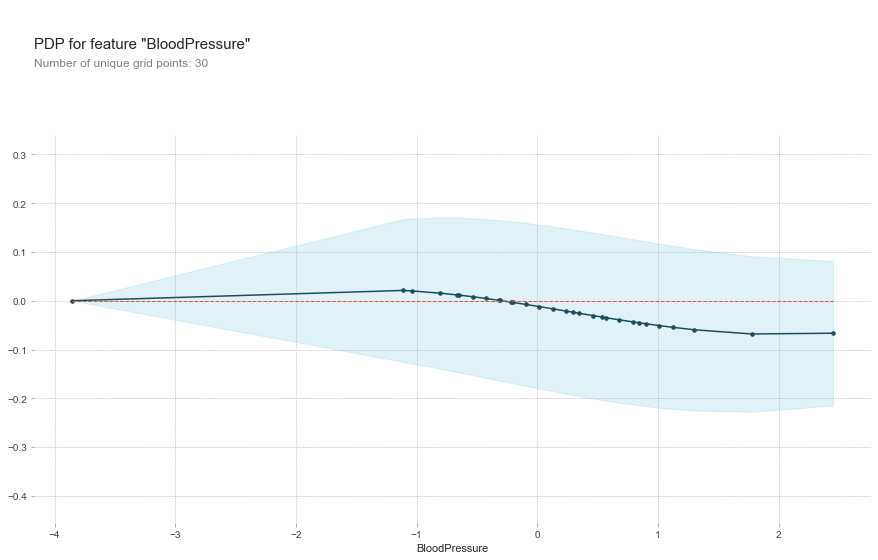

<Figure size 1080x684 with 2 Axes>

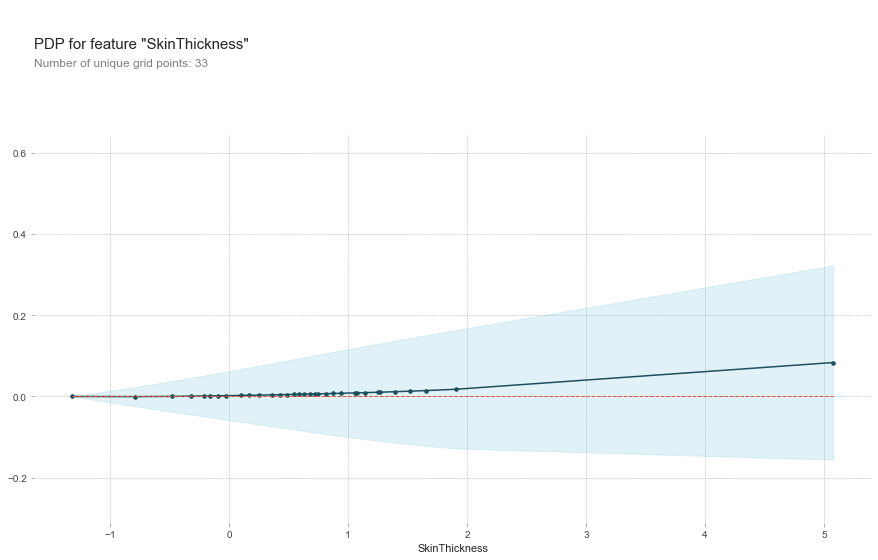

<Figure size 1080x684 with 2 Axes>

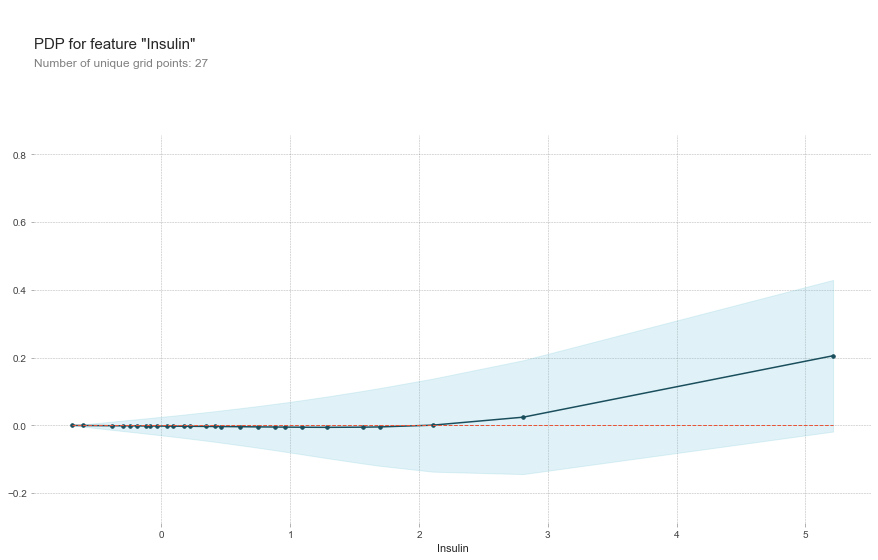

<Figure size 1080x684 with 2 Axes>

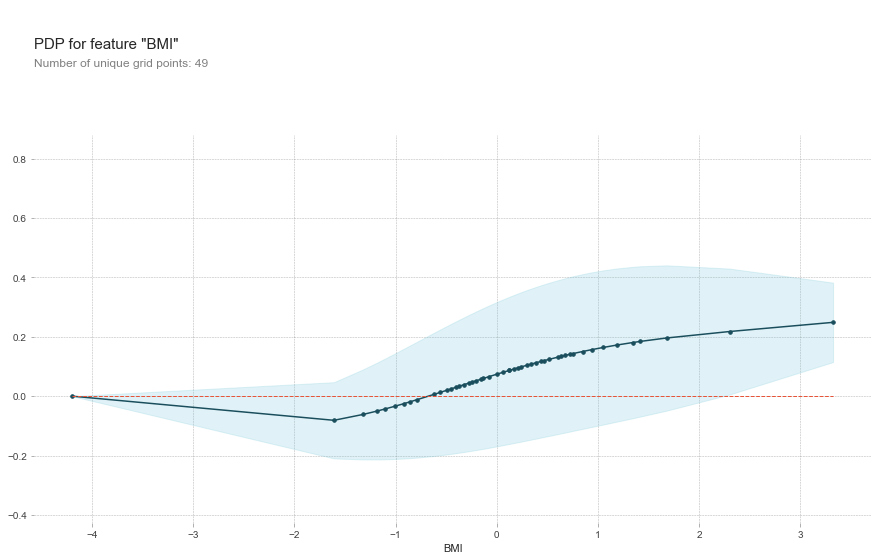

<Figure size 1080x684 with 2 Axes>

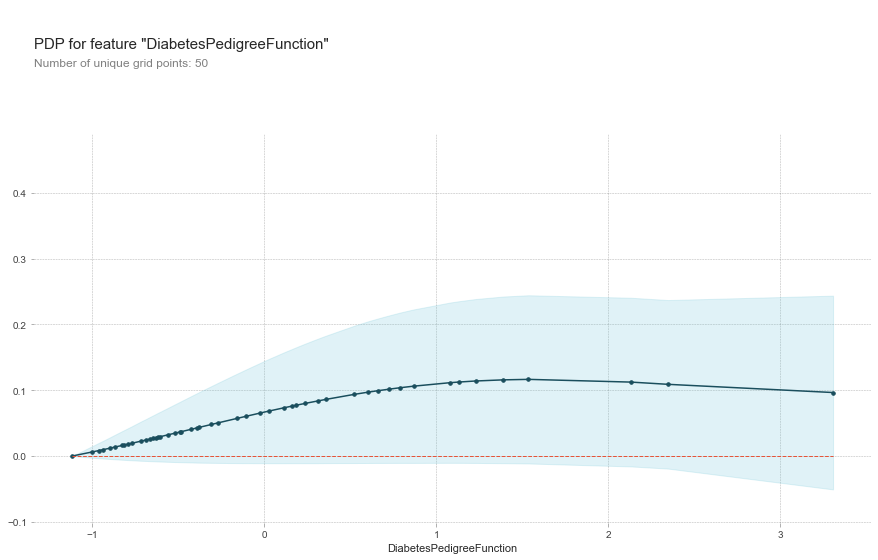

<Figure size 1080x684 with 2 Axes>

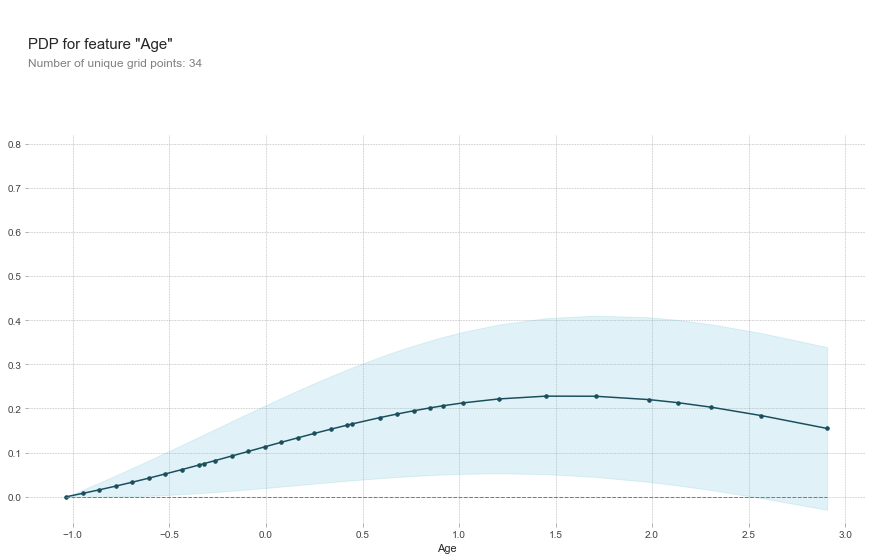

<Figure size 1080x684 with 2 Axes>

In [ ]:
# Iterate over each feature and plot the pdp curve
for feature_name in X_test_svm.columns:
    # Calculate pdp data
    pdp_data_svm_all = pdp.pdp_isolate(model=clf_svm, dataset=X_test_svm, model_features=X_test_svm.columns, feature=feature_name,num_grid_points = 50)

    # Plot pdp curve
    pdp.pdp_plot(pdp_data_svm_all, feature_name)
    plt.show()

# K means

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
file_path = 'diabetes.csv'
df = pd.read_csv(file_path)
df.describe()

# Extract the features and target variable
X_km = df.drop(['Outcome'], axis=1)
y_km = df['Outcome']

# Standardize the features while preserving the DataFrame structure
scaler_km = StandardScaler()
X_km = pd.DataFrame(scaler_km.fit_transform(X_km), columns=X_km.columns)

# Split the data into training and test sets
X_train_km, X_test_km, y_train_km, y_test_km = train_test_split(X_km, y_km, test_size=0.2, random_state=42)

# Perform K-means clustering
n_clusters = 9# Adjust the number of clusters 
clf_km = KMeans(n_clusters=n_clusters, random_state=42)
clf_km.fit(X_train_km)

# Assign labels to cluster centers based on majority class of training data
cluster_centers = clf_km.cluster_centers_
cluster_labels = []

for i, cluster_center in enumerate(cluster_centers):
    cluster_instances = y_train_km[clf_km.labels_ == i]
    majority_class = cluster_instances.value_counts().idxmax()
    cluster_labels.append(majority_class)

print(cluster_labels)

# Calculate the majority label in each cluster
parkinsons_count_km = y_train_km.sum()
cluster_counts_km = pd.Series(clf_km.predict(X_train_km)).value_counts()
parkinsons_per_cluster_km = [
    cluster_counts_km[i] * (y_train_km.iloc[clf_km.labels_ == i].sum() / cluster_counts_km[i])
    for i in range(len(cluster_counts_km))
]
print(parkinsons_per_cluster_km)
print("Cluster Sizes:", cluster_counts_km)


# Wrapper class for K-means model
class KMeansWrapper:
    def __init__(self, kmeans_model, cluster_labels):
        self.model = kmeans_model
        self.cluster_labels = cluster_labels
    
    def predict(self, X):
        # Get the distances between test data and cluster centers
        distances = self.model.transform(X)
        #print (distances)
        
        # Assign the labels based on the closest cluster center
        #cluster_labels = self.model.predict(X)
        closest_cluster_labels = []
        
        for i in range(len(X)):
            closest_cluster_index = np.argmin(distances[i])
            closest_cluster_label = self.cluster_labels[closest_cluster_index]
            closest_cluster_labels.append(closest_cluster_label)
        
        return closest_cluster_labels
    
    def predict_proba(self, X): # For each clusters
        # Get the distances between test data and cluster centers
        distances = self.model.transform(X)
        
        # Find the closest cluster center for each instance
        closest_cluster_indices = np.argmin(distances, axis=1)
        
        # Assign the majority class label to each cluster center
        cluster_majority_labels = [self.cluster_labels[i] for i in closest_cluster_indices]
        
        # Calculate the probability estimates
        cluster_counts = np.bincount(closest_cluster_indices, minlength=n_clusters)
        probabilities = cluster_counts / len(closest_cluster_indices)
        
        # Create the probability array for each instance
        instance_probabilities = (closest_cluster_indices[:, np.newaxis] == np.arange(n_clusters)) * probabilities

        
        return instance_probabilities
    
    def predict_proba_binary(self, X):# For prediction 0 or 1
        # Get the distances between test data and cluster centers
        distances = self.model.transform(X)
    
        # Find the closest cluster center for each instance
        closest_cluster_indices = np.argmin(distances, axis=1)
    
        # Calculate the probability of belonging to class 1 for each instance
        cluster_probabilities = [1 if self.cluster_labels[i] == 1 else 0 for i in closest_cluster_indices]
    
        # Create the probability array for each instance
        instance_probabilities = np.array(cluster_probabilities)[:, np.newaxis]
    
        return instance_probabilities




# Create a wrapper instance for the K-means model
wrapped_model = KMeansWrapper(clf_km, cluster_labels)

# Predict the test set labels using the wrapper model
y_pred_km = wrapped_model.predict(X_test_km)

# Calculate the prediction accuracy
accuracy_km = accuracy_score(y_test_km, y_pred_km)
print(f"Accuracy: {accuracy_km}")

# Predict the test set probabilities using the wrapper model
y_pred_proba_km = wrapped_model.predict_proba(X_test_km)

# Display the predicted probabilities
#print("Predicted Probabilities:")
#print(y_pred_proba_km)

[1, 0, 0, 0, 0, 0, 0, 1, 1]
[21.0, 6.0, 10.0, 37.0, 32.0, 25.0, 23.0, 40.0, 19.0]
Cluster Sizes: 1    133
6     99
3     88
4     79
7     75
5     55
0     33
8     27
2     25
dtype: int64
Accuracy: 0.7207792207792207


| k (num of clusters)   | Accuracy| 
|:--------|:-------------|
| 2 |  62.99%      |    
| 3 |  68.18%      |   
| 4 |  68.83%      |  
| 5 |  67.53%         |  
| 6 |  67.53%      | 
| 7 |  70.58%      | 
| 8 |  71.42%      | 
| 9 |  72.08%      | 
| 10 |  71.42%      | 

## Permutation Importance 

Age: 91.6804
SkinThickness: 91.3761
Insulin: 63.9565
Pregnancies: 61.9565
BloodPressure: 60.5397
BMI: 39.4247
Glucose: 35.9739
DiabetesPedigreeFunction: 11.5279


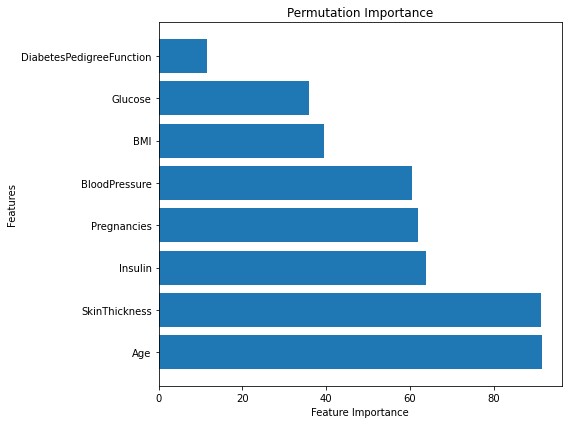

In [12]:
np.random.seed(23)
# Perform permutation importance
result_km = permutation_importance(clf_km, X_test_km, y_test_km, n_repeats=10, random_state=42)

# Get feature importance scores
importance_scores_km = result_km.importances_mean

# Sort features by importance score in descending order
sorted_indices_km = np.argsort(importance_scores_km)[::-1]
sorted_features_km = X_km.columns[sorted_indices_km]
sorted_scores_km = importance_scores_km[sorted_indices_km]

# Print feature importance
for feature_km, score_km in zip(sorted_features_km, sorted_scores_km):
    print("{}: {:.4f}".format(feature_km, score_km))

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(sorted_features_km, sorted_scores_km)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

## SHAP 

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.




  0%|          | 0/154 [00:00<?, ?it/s]

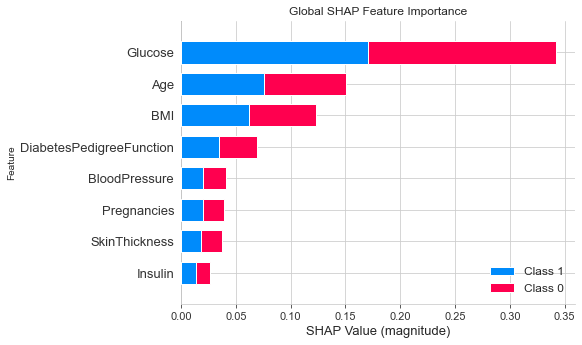

<Figure size 576x338.4 with 1 Axes>

In [ ]:
# Create a KernelExplainer object
explainer_km = shap.KernelExplainer(wrapped_model.predict_proba_binary, X_train_km)

# Calculate SHAP values for all features
shap_values_km = explainer_svm.shap_values(X_test_km)

# Plot the global SHAP summary plot
shap.summary_plot(shap_values_km, X_test_km, plot_type="bar", show=False)

# Set plot parameters
plt.title("Global SHAP Feature Importance")
plt.xlabel("SHAP Value (magnitude)")
plt.ylabel("Feature")

# Show the plot
plt.show()

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.






<IPython.core.display.HTML object>

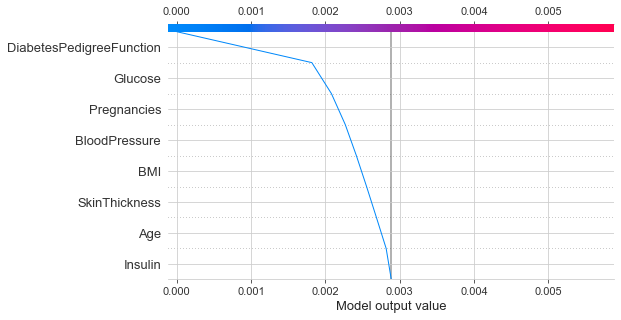

<Figure size 576x338.4 with 1 Axes>

<IPython.core.display.HTML object>

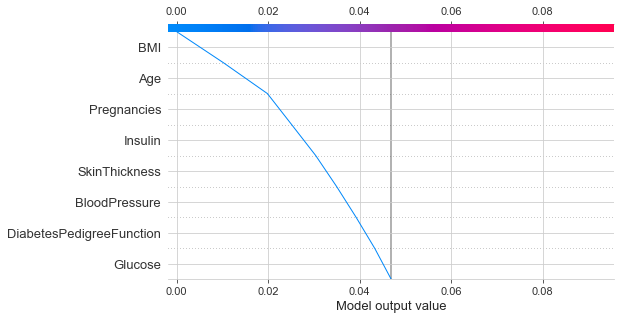

<Figure size 576x338.4 with 1 Axes>

In [ ]:
np.random.seed(36)
# Create explainer
explainer_km = shap.KernelExplainer(wrapped_model.predict_proba, X_train_km)


# Select the instance for generating the explanation
i_km = 5
data_for_prediction_km = X_test_km.iloc[i_km, :]

# Generate SHAP values for the instance
shap_values_km = explainer_km.shap_values(data_for_prediction_km)

# Set the class index for negative prediction
class_index_km = 0  

# Access the expected value for the negative class
expected_value_negative_km = explainer_km.expected_value[class_index_km]

# Access the SHAP values 
shap_values_negative_km = shap_values_km[class_index_km]

shap.initjs()


shap.decision_plot(expected_value_negative_km, shap_values_negative_km, feature_names=X_test_km.columns.tolist())
class_index_km = 1  
expected_value_positive_km = explainer_km.expected_value[class_index_km]
shap_values_positive_km = shap_values_km[class_index_km]
shap.initjs()

# Create the decision plot 
shap.decision_plot(expected_value_positive_km, shap_values_positive_km, feature_names=X_test_km.columns.tolist())

## ALE 

                  eff  size
Pregnancies                
-1.141852   -0.263915   0.0
-0.844885   -0.263915  39.0
-0.547919   -0.049629  28.0
-0.250952   -0.049629  11.0
 0.046014    0.200371  16.0
 0.342981    0.200371  12.0
 0.639947    0.200371   6.0
 0.936914    0.200371  10.0
 1.233880    0.200371  10.0
 1.530847    0.200371   6.0
 1.827813    0.200371   5.0
 2.124780    0.200371   3.0
 2.421746    0.200371   4.0
 2.718712    1.200371   4.0
                eff  size
Glucose                  
-1.843231  0.673810   0.0
-1.498962  0.673810   4.0
-1.467665  0.673810   3.0
-1.342476  0.673810   3.0
-1.248585  0.673810   3.0
-1.154694  0.673810   5.0
-1.123396  0.673810   2.0
-1.060802  0.673810   2.0
-0.998208  0.673810   3.0
-0.935613  0.673810   4.0
-0.904316  0.673810   3.0
-0.873019  0.673810   2.0
-0.810425  0.673810   4.0
-0.779128  0.673810   3.0
-0.716533  0.673810   2.0
-0.653939  0.673810   3.0
-0.591345  0.673810   3.0
-0.528751  0.673810   7.0
-0.497453  0.673810   3.0
-0.434

PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


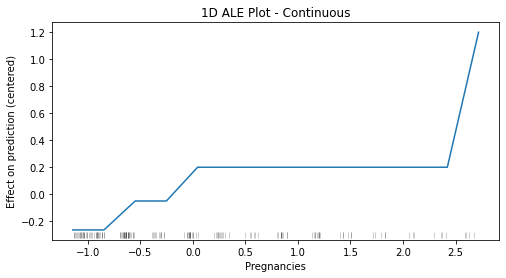

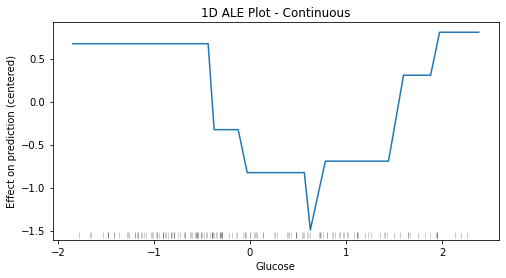

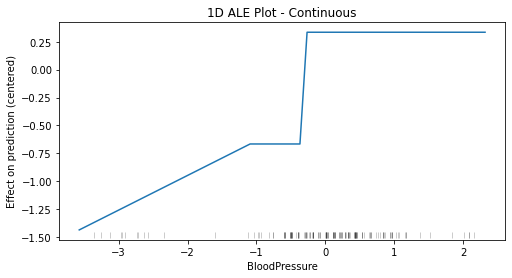

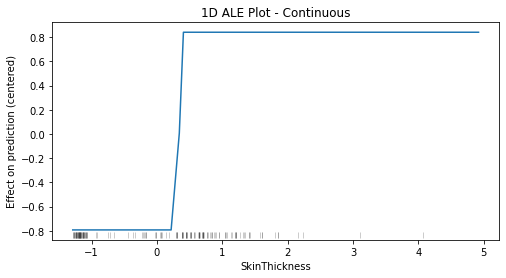

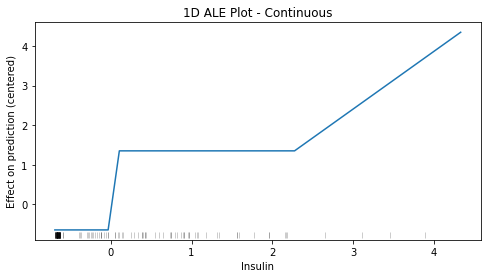

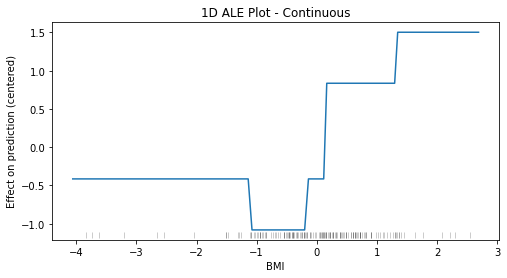

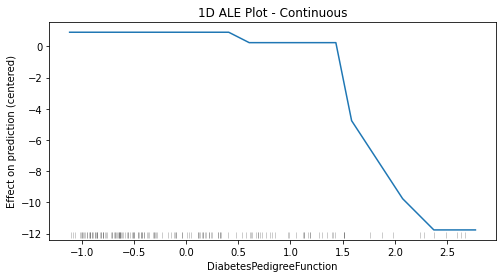

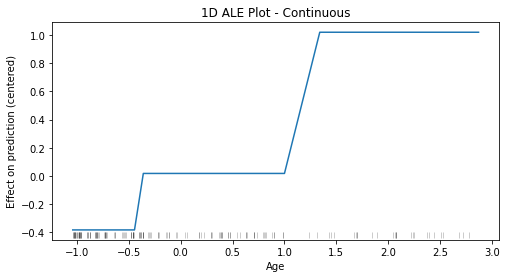

In [20]:
# Convert NumPy array to DataFrame
X_test_km = pd.DataFrame(X_test_km)

for feature in X_test_km.columns:
    ale_eff_km = ale(X=X_test_km, model=clf_km, feature=[feature], grid_size=50, include_CI=False)
    print(ale_eff_km)

## PDP 

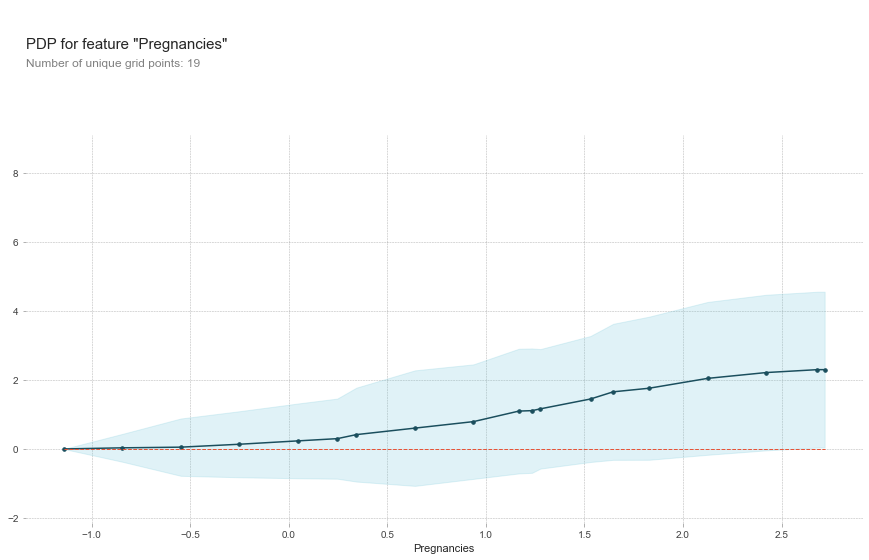

<Figure size 1080x684 with 2 Axes>

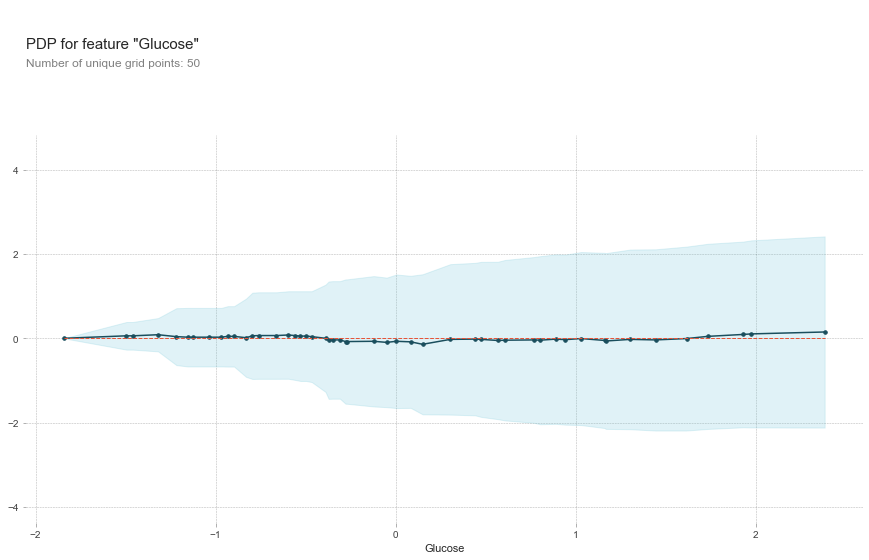

<Figure size 1080x684 with 2 Axes>

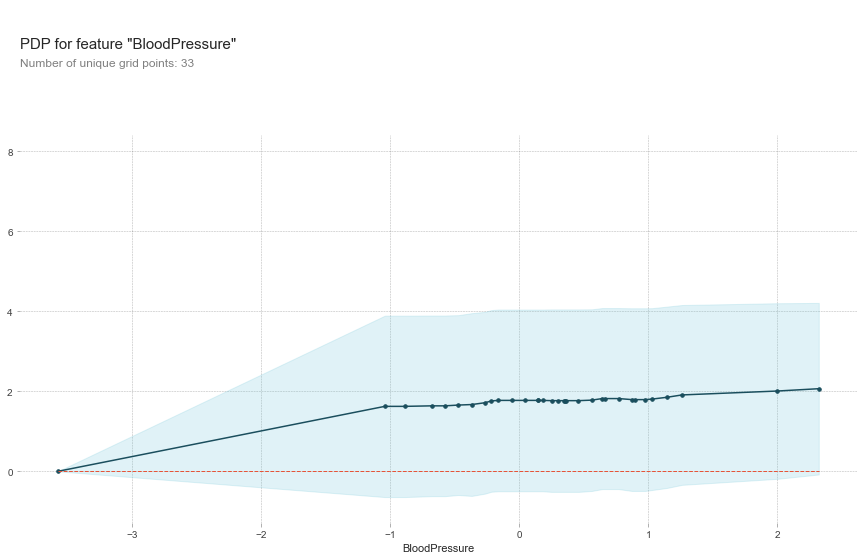

<Figure size 1080x684 with 2 Axes>

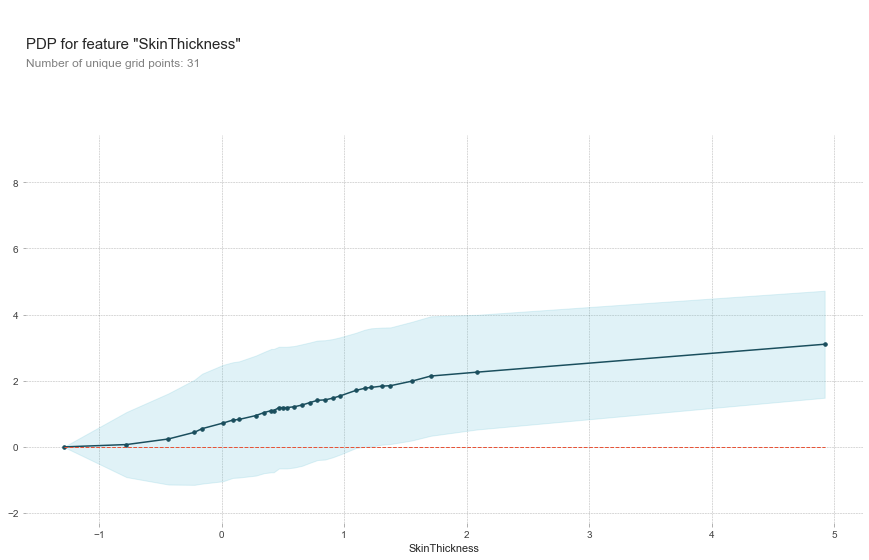

<Figure size 1080x684 with 2 Axes>

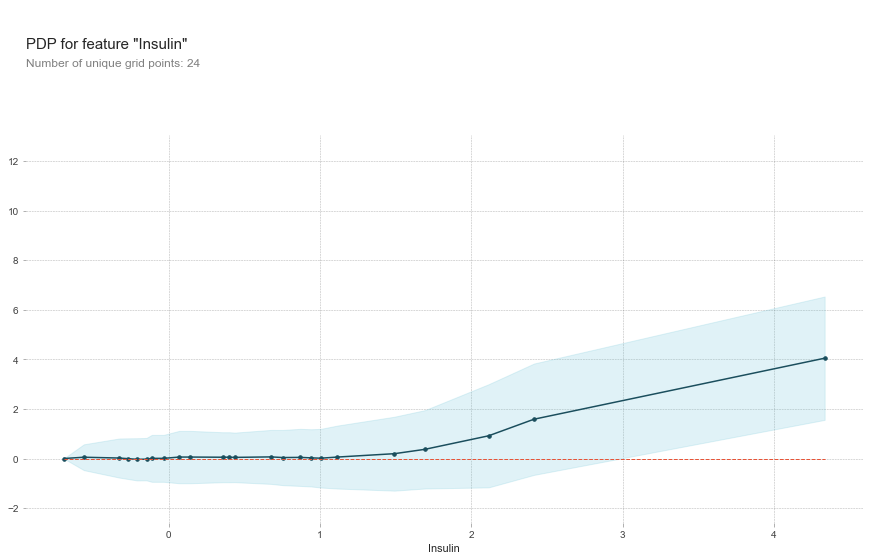

<Figure size 1080x684 with 2 Axes>

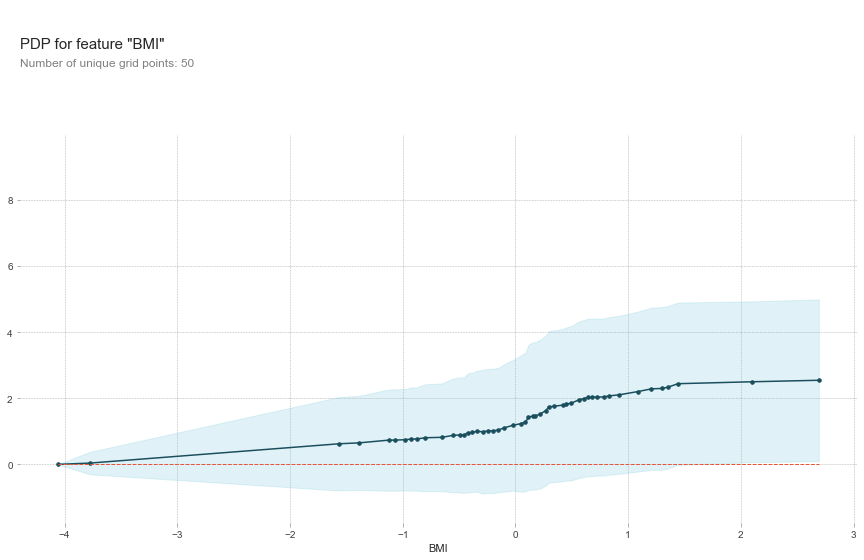

<Figure size 1080x684 with 2 Axes>

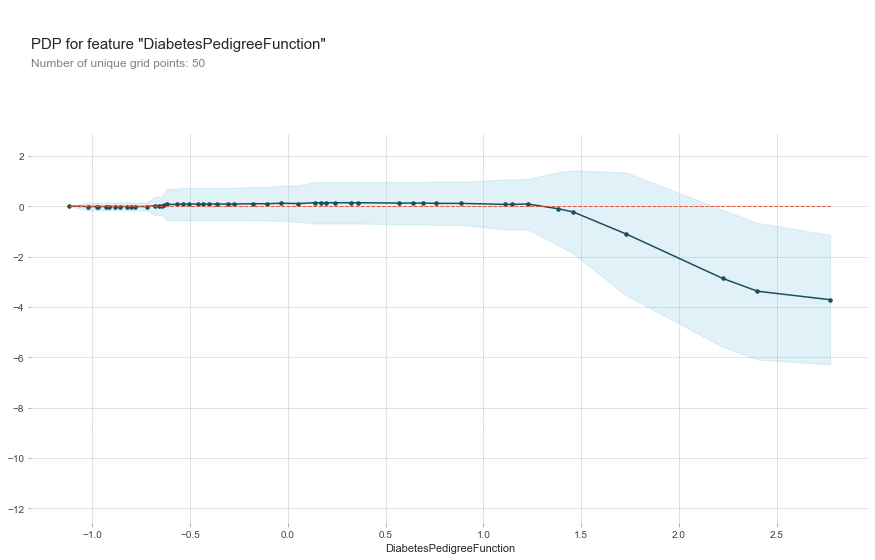

<Figure size 1080x684 with 2 Axes>

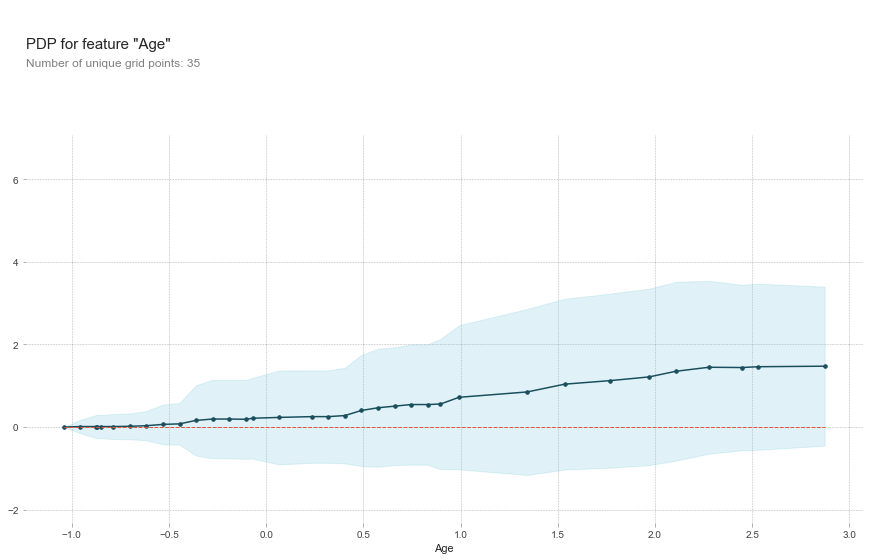

<Figure size 1080x684 with 2 Axes>

In [ ]:
# Iterate over each feature and plot the pdp curve
for feature_name in X_test_km.columns:
    # Calculate pdp data
    pdp_data_km_all = pdp.pdp_isolate(model=clf_km, dataset=X_test_km, model_features=X_test_km.columns, feature=feature_name,num_grid_points = 50)

    # Plot pdp curve
    pdp.pdp_plot(pdp_data_km_all, feature_name)
    plt.show()